#  Sales Prediction : Predicting the sales for Rossmann Stores


### Problem Statement


> Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.







### Evaluation Metric 

The Submissions for this Kaggle competition are evaluated on the Root Mean Square Percentage Error (RMSPE). The RMSPE is calculated as 

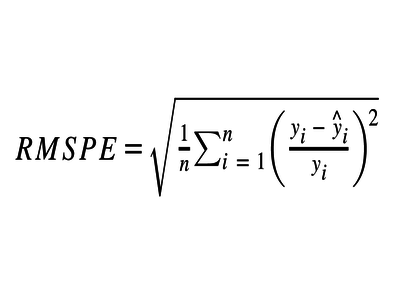


where y_i denotes the sales of a single store on a single day and yhat_i denotes the corresponding prediction. Any day and store with 0 sales is ignored in scoring.

### Data Description

 The dataset is provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment. 


<p>Files</p>

- train.csv - Historical data including Sales
- store.csv - Supplemental information about the stores

- test.csv - Historical data excluding Sales
- sample_submission.csv - a sample submission file in the correct format


Data fields
<p>Most of the fields are self-explanatory. The following are descriptions for those that aren't.</p>

<ol>
<li><strong>Id </strong>- an Id that represents a (Store, Date) duple within the test set</li>
<li><strong>Store </strong>- a unique Id for each store</li>
<li><strong>Sales </strong>- the turnover for any given day (this is what you are predicting)</li>
<li><strong>Customers </strong>- the number of customers on a given day</li>
<li><strong>Open </strong>- an indicator for whether the store was open: 0 = closed, 1 = open</li>
<li><strong>StateHoliday </strong>- indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None</li>
<li><strong>SchoolHoliday </strong>- indicates if the (Store, Date) was affected by the closure of public schools</li>
<li><strong>StoreType </strong>- differentiates between 4 different store models: a, b, c, d</li>
<li><strong>Assortment </strong>- describes an assortment level: a = basic, b = extra, c = extended</li>
<li><strong>CompetitionDistance </strong>- distance in meters to the nearest competitor store</li>
<li><strong>CompetitionOpenSince[Month/Year] </strong>- gives the approximate year and month of the time the nearest competitor was opened</li>
<li><strong>Promo </strong>- indicates whether a store is running a promo on that day</li>
<li><strong>Promo2 </strong>- Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating</li>
<li><strong>Promo2Since[Year/Week] </strong>- describes the year and calendar week when the store started participating in Promo2</li>
<li><strong>PromoInterval </strong>- describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store</li>
</ol>

### Data Gathering & Cleaning

Here we are Predicting the sales for the Rossman stores using the historical data. Let's start by installing the required packages and Downloading the dataset.

#### Installing and Importing the required packages.



> PIP is the standard package mangement system in Python, below are the packages we need to install for this project.




In [ ]:
!pip install jovian numpy pandas matplotlib==3.1.1 plotly seaborn opendatasets scikit-learn --upgrade --quiet

     |████████████████████████████████| 68 kB 3.3 MB/s 
     |████████████████████████████████| 13.1 MB 11.2 MB/s 
     |████████████████████████████████| 15.2 MB 48.6 MB/s 


In [ ]:
import jovian
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib
import opendatasets as od
import os
import joblib
%matplotlib inline

sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (8,6)
matplotlib.rcParams["figure.facecolor"] = '#00000000' 

#### Downloading and Loading the Dataset

In [ ]:
dataset_url = 'https://www.kaggle.com/c/rossmann-store-sales'

In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kallurivasanthsai
Your Kaggle Key: ··········


100%|██████████| 6.99M/6.99M [00:00<00:00, 62.5MB/s]


Extracting archive ./rossmann-store-sales/rossmann-store-sales.zip to ./rossmann-store-sales


In [ ]:
os.listdir('rossmann-store-sales')

['test.csv', 'sample_submission.csv', 'store.csv', 'train.csv']

In [ ]:
sales_df = pd.read_csv("./rossmann-store-sales/train.csv",low_memory=False)

In [ ]:
sales_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
store_df = pd.read_csv("./rossmann-store-sales/store.csv")

In [ ]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


- This dataset also contains test set.

In [ ]:
test_df = pd.read_csv("./rossmann-store-sales/test.csv",low_memory=False,index_col="Id")

In [ ]:
test_df

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
Id,,,,,,,
1,1,4,2015-09-17,1.0,1,0,0
2,3,4,2015-09-17,1.0,1,0,0
3,7,4,2015-09-17,1.0,1,0,0
4,8,4,2015-09-17,1.0,1,0,0
5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...
41084,1111,6,2015-08-01,1.0,0,0,0
41085,1112,6,2015-08-01,1.0,0,0,0
41086,1113,6,2015-08-01,1.0,0,0,0


#### Viewing and Cleaning the dataset

- Exploring sales and test datasets

In [ ]:
sales_df.shape , test_df.shape

((1017209, 9), (41088, 7))

In [ ]:
sales_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


- There are no missing values in the sales dataframe and it has 2 object columns, we will convert the "Date" to datetime type.

In [ ]:
sales_df.duplicated().sum()

0

- There are no duplicate values in the dataset.

In [ ]:
round(sales_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0


- The "Sales" Column does have some outliers. we will deal with this later.

In [ ]:
sales_df.groupby('Store').count()

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Store,,,,,,,,
1,942,942,942,942,942,942,942,942
2,942,942,942,942,942,942,942,942
3,942,942,942,942,942,942,942,942
4,942,942,942,942,942,942,942,942
5,942,942,942,942,942,942,942,942
...,...,...,...,...,...,...,...,...
1111,942,942,942,942,942,942,942,942
1112,942,942,942,942,942,942,942,942
1113,942,942,942,942,942,942,942,942


- There are 1115 stores in this sales dataset and each store has around 942 rows which is around 3 years historical data. 

we will parse the "Date" coulumn to datetime type

In [ ]:
sales_df["Date"] = pd.to_datetime(sales_df["Date"])

In [ ]:
sales_df["Date"].min(),sales_df["Date"].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

- we do have 3 years of historical data in this sales dataframe

As we have to predict the sales column we will also check for any sales values that could be false

In [ ]:
### Will Check sales is less than 0 for any day
negative_sale_filt = sales_df['Sales'] < 0
sales_df[negative_sale_filt]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [ ]:
### If store is closed and there is sale
is_closed = sales_df['Open'] == 0
is_sale = sales_df['Sales'] > 0
sales_df[is_closed & is_sale]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [ ]:
# Closed Stores
sales_df['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [ ]:
# If store is closed and Sales is also 0.
sales_df[(sales_df['Open'] == 0) & (sales_df['Sales']==0)].shape

(172817, 9)

- If the store is closed then the sales value is 0. we dont have to predict the sale value for this days. we will remove this rows from our dataset and drop the "Open" column.

In [ ]:
### Removing observations where store is closed and sale is 0.
sales_df = sales_df[(sales_df['Open'] == 1)].copy()

In [ ]:
### Dropping Open column as it has single observation for all now. 
sales_df.drop(['Open'],axis = 1, inplace=True)

In [ ]:
sales_df.shape

(844392, 8)

In [ ]:
# If store is open and there is no sale
len(sales_df[(sales_df['Sales'] == 0)])

54

- There are very few observations where Sales is 0. This can be a possibility that on certain days there was no Sale.

Analyze the test dataset and perform the same steps as sales dataset

In [ ]:
test_df.shape

(41088, 7)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 1 to 41088
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          41088 non-null  int64  
 1   DayOfWeek      41088 non-null  int64  
 2   Date           41088 non-null  object 
 3   Open           41077 non-null  float64
 4   Promo          41088 non-null  int64  
 5   StateHoliday   41088 non-null  object 
 6   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 2.5+ MB


- The test dataset does not have customers data. we cannot use that in our prediction.

In [ ]:
# The are 11 samples we can replace them with zeros or drop them
test_df.Open.fillna(1,inplace=True)

In [ ]:
test_close_filt = (test_df['Open'] == 0)
test_close_filt.to_csv("test_close_filt.csv")

In [ ]:
# Parsing the date column 
test_df["Date"] = pd.to_datetime(test_df["Date"])
test_df["Date"].min(),test_df["Date"].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

- we have about 6 weeks of test data and this data is future data to our sales data.

Exploring the Store dataset which has information regarding the stores.

In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
store_df.shape

(1115, 10)

In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


- This dataset contains information on all stores. Like type of store, range of products, competitions and if store is participating in different promo and for how long. 
- We have null/ missing values in some columns. Will try to deal with them first. Also we have store column that is common and will see if it is unique and we can merge to sales df

In [ ]:
# comparing the store ids in store_df and sales_df 
unique_stores_in_sales_df = set(pd.DataFrame(sales_df['Store'].value_counts()).index.to_list()) 
unique_stores_in_store_df = set(pd.DataFrame(store_df['Store'].value_counts()).index.to_list())
non_matching_stores = unique_stores_in_sales_df - unique_stores_in_store_df
non_matching_stores

set()

- Both have equal and same no of stores. So can merge based on this column after analysis done.

Are there any Patterns in NULL values?

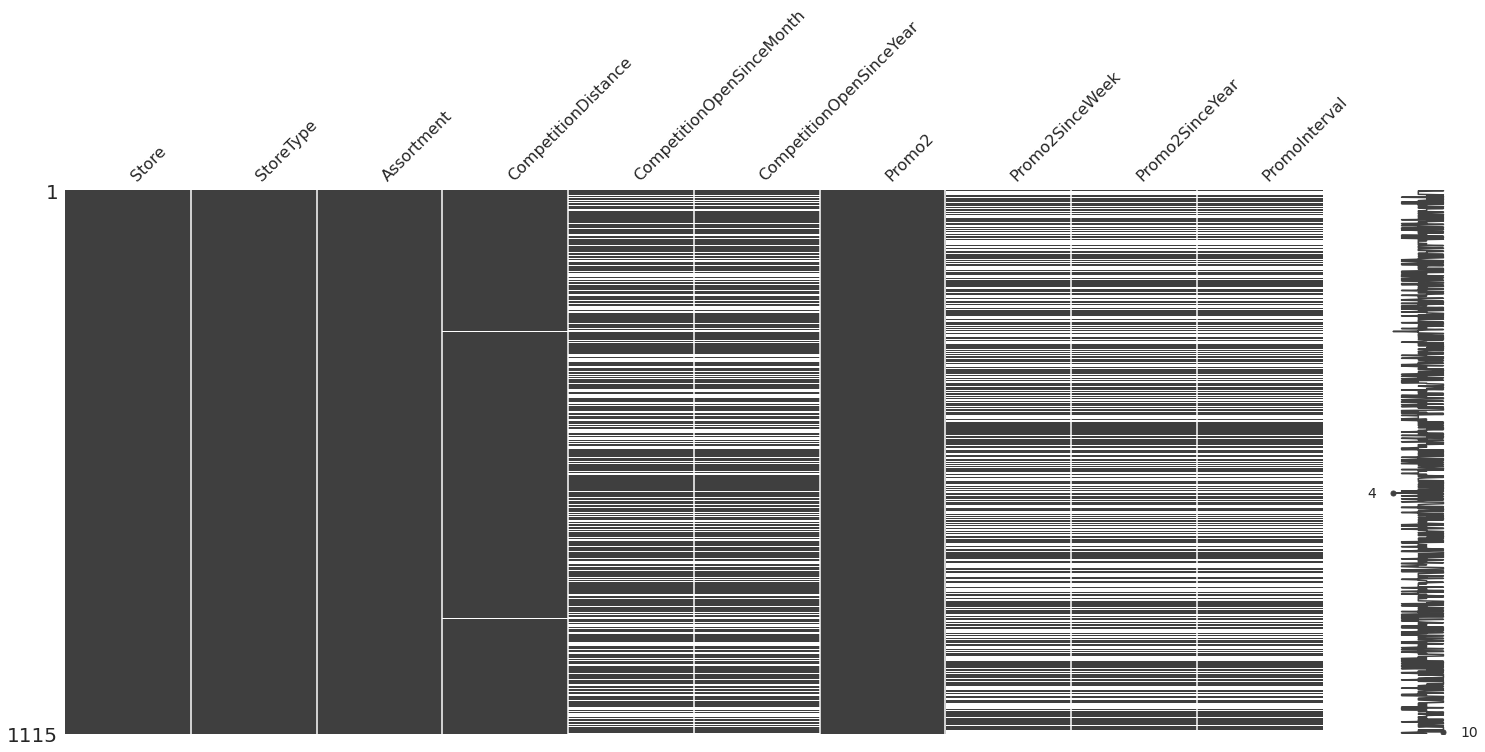

In [ ]:
import missingno as msno
msno.matrix(store_df);

- Above plot shows that for last three columns all null values are in same rows

In [ ]:
## NO of NAN values in each column
store_df.isnull().sum().sort_values(ascending=False)

Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
CompetitionDistance            3
Store                          0
StoreType                      0
Assortment                     0
Promo2                         0
dtype: int64

In [ ]:
#Checking if the null values are beacuse of the Promo (i.e) when the store is NOT participating in promo we do not have information for Promo2SinceWeek,Promo2SinceYear,PromoInterval
print("No of stores Not participaring in the Promo2 : ", (store_df["Promo2"]==0).sum())
print("No of NaN values in Promo2SinceWeek when store Not participating in the Promo2 : ",  ((store_df["Promo2"]==0) & (store_df["Promo2SinceWeek"].isna())).sum())
print("No of NaN values in Promo2SinceYear when store Not participating in the Promo2 : ",  ((store_df["Promo2"]==0) & (store_df["Promo2SinceYear"].isna())).sum())
print("No of NaN values in PromoInterval when store Not participating in the Promo2 : ",  ((store_df["Promo2"]==0) & (store_df["PromoInterval"].isna())).sum())

No of stores Not participaring in the Promo2 :  544
No of NaN values in Promo2SinceWeek when store Not participating in the Promo2 :  544
No of NaN values in Promo2SinceYear when store Not participating in the Promo2 :  544
No of NaN values in PromoInterval when store Not participating in the Promo2 :  544


- There are no such stores that are running promo and information for them is missing. As of now we will impute 0 in the promo interval column and we will impute the other two columns later.

In [ ]:
# Replacing Nan with 0 in PromoInterval col.
store_df['PromoInterval'].fillna(0,inplace=True)

- The CompetitionDistance is the distance in meters to the nearest competitor store. The missing values in this column could mean that there is no competion near to the store. 

In [ ]:
# Replacing Nan with 2 times the  max CompetitionDistance of all the stores. 
max_comp_distance = store_df['CompetitionDistance'].max()
store_df['CompetitionDistance'].fillna(2*max_comp_distance,inplace=True)

In [ ]:
## NO of NAN values in each column after the above changes
store_df.isnull().sum().sort_values(ascending=False)

Promo2SinceWeek              544
Promo2SinceYear              544
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
Promo2                         0
PromoInterval                  0
dtype: int64

- For Month and year we cannot use mean or mode as there are many missing values. we will come back to this later

Merge the Sales and test datasets with store dataset

In [ ]:
merged_df = sales_df.merge(store_df, how='left', on='Store')
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,0
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,0
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,682,2,2013-01-01,3375,566,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,0
844388,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,0
844389,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
844390,948,2,2013-01-01,4491,1039,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,0


In [ ]:
merged_test_df = test_df.merge(store_df, how='left', on='Store') 
merged_test_df

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,0
1,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,0
3,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,0
4,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,0
41085,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,0
41086,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,0


## Exploratory Data Analysis

In this EDA we will analyze the importance of each feature with sales, to further imporove the features that are used in the models.

### Sales

- The distribution of sales

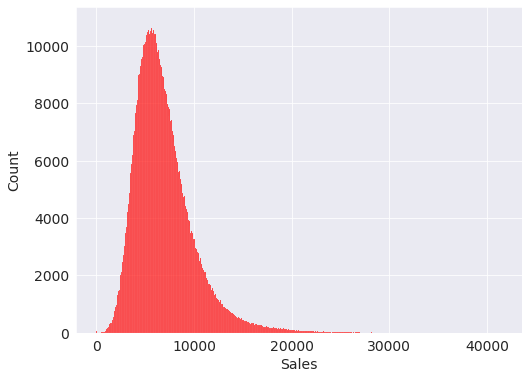

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(merged_df["Sales"], color='r');

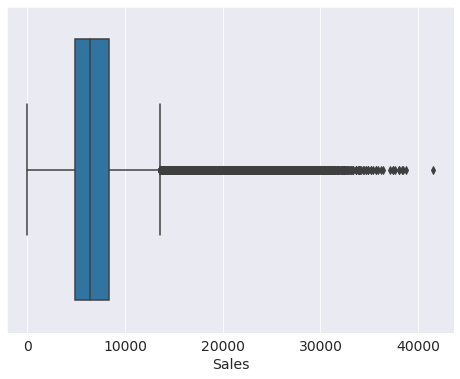

In [ ]:
# Checking outliers in Sales
sns.boxplot(x=merged_df['Sales']);

- We do not have any misleading values in this dataset. i.e. No negative sales or sale when store was closed.
- There are Many outliers on right side in above plot. So might be those stores are having high sales. But will remove still those with very high sales.
- As the store Id is categorical it is important to know the importance of store id while predicting the Sales, The Avg sales would give the some weight to the stores instead of store id, we can add a feature of average sales per day.

### Customers

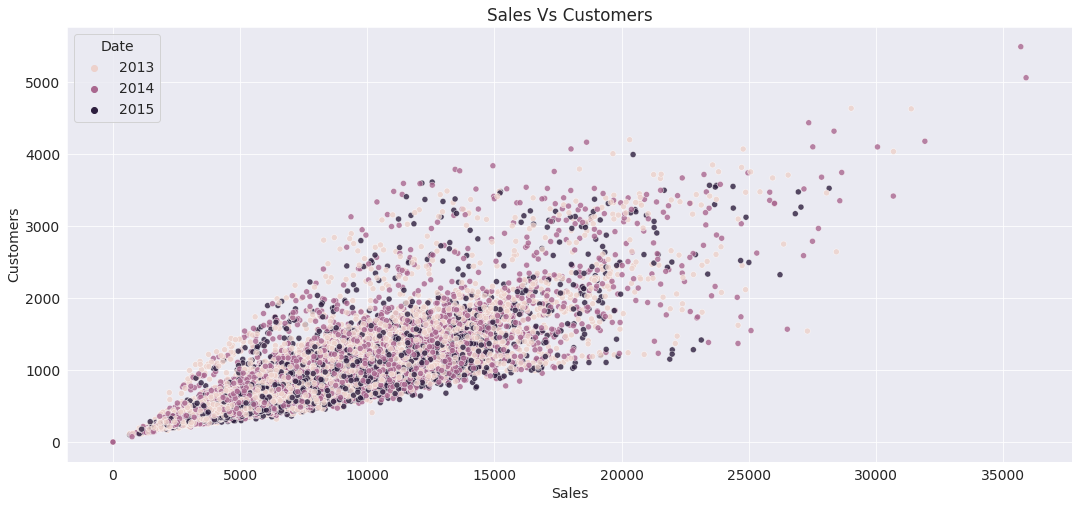

In [ ]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(40000)
sns.scatterplot(x=temp_df.Sales, y=temp_df.Customers, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Sales Vs Customers")
plt.show();

- The No of customers have a strong correlation with sales. Here for this Kaggle competition the test dataset do not have customers info which is why we are ignoring it. 
- In the Future we can predict the No of customers and use that information to predict the Sales.

### DayOfWeek

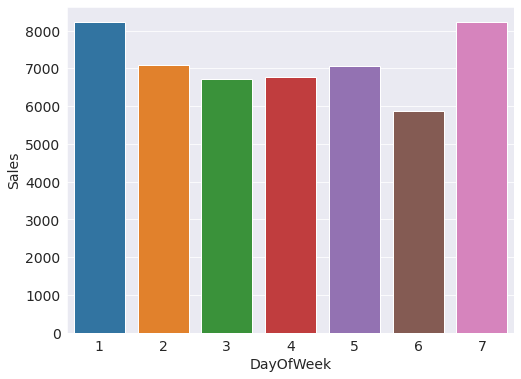

In [ ]:
# How Sales differ in each day of week
Avg_week_sales = pd.DataFrame(merged_df.groupby('DayOfWeek').agg({'Sales':'mean'}))
sns.barplot(x=Avg_week_sales.index, y = Avg_week_sales['Sales'])

- The sales are High during the start of the week and on sunday's only some  of the stores are open but the they are making great sales.

In [ ]:
# Stores open on Sunday
merged_df[(merged_df['DayOfWeek']==7)]['Store'].unique()

array([  85,  122,  209,  259,  262,  274,  299,  310,  335,  353,  423,
        433,  453,  494,  512,  524,  530,  562,  578,  676,  682,  732,
        733,  769,  863,  867,  931,  948, 1045, 1081, 1097, 1099,  877])

### Promo

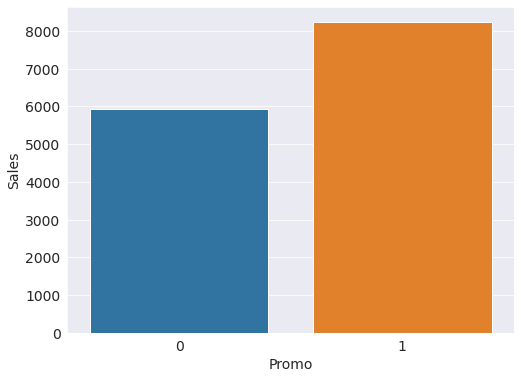

In [ ]:
Avg_Promo_sales = pd.DataFrame(merged_df.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Avg_Promo_sales.index, y = Avg_Promo_sales['Sales'])

- Here we observe that Sales increases by a significant amount during Promo day. This shows that Promotion has a positive effect for a store.

### State and Schoool Holiday

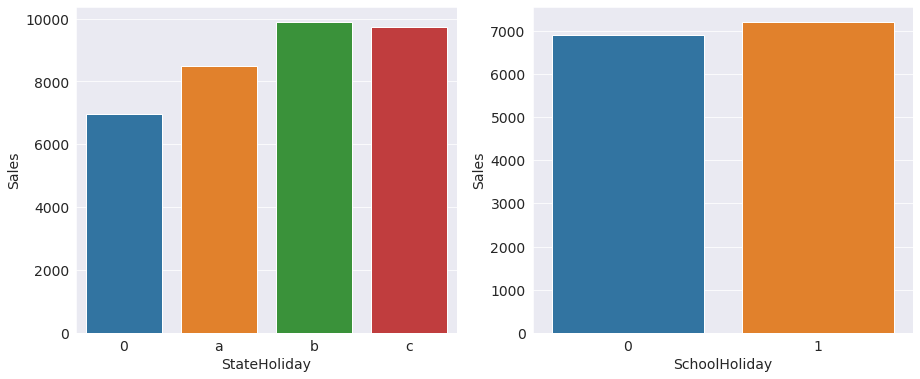

In [ ]:
Avg_StateHoliday_sales = pd.DataFrame(merged_df.groupby('StateHoliday').agg({'Sales':'mean'}))
Avg_SchoolHoliday_sales = pd.DataFrame(merged_df.groupby('SchoolHoliday').agg({'Sales':'mean'}))

# How sales differ in holidays
fig, ax = plt.subplots(1,2,figsize=(15,6))
ax1=plt.subplot(1, 2,1)
sns.barplot(x=Avg_StateHoliday_sales.index, y = Avg_StateHoliday_sales['Sales'])
ax1=plt.subplot(1, 2,2)
sns.barplot(x=Avg_SchoolHoliday_sales.index, y = Avg_SchoolHoliday_sales['Sales']);

- The Average sales on the SchoolHoliday is mostly same.
- But on stateHoliday's the average sales are much higher than normal days

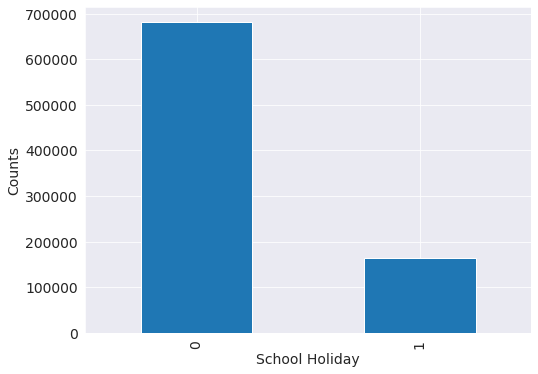

In [ ]:
# How many Total School and State holidays
merged_df['SchoolHoliday'].value_counts().plot(kind='bar')
plt.xlabel('School Holiday')
plt.ylabel('Counts');

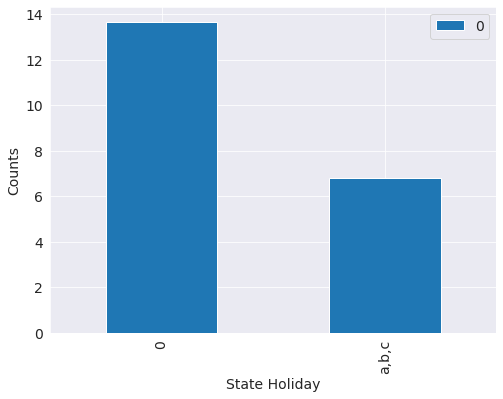

In [ ]:
stateholiday_data = {
    "0" : [np.log(merged_df['StateHoliday'].value_counts().loc["0"])],
    "a,b,c": [np.log(merged_df['StateHoliday'].value_counts().loc["a":"c"].sum())]
}
stateholiday_df = pd.DataFrame(data=stateholiday_data)
stateholiday_df.T.plot(kind="bar")
plt.xlabel('State Holiday')
plt.ylabel('Counts');

- The Number of state holidays is very low compared to school holidays and normal days.

### storeType

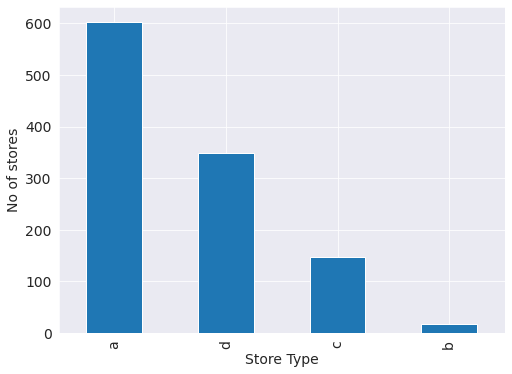

In [ ]:
store_df['StoreType'].value_counts().plot(kind='bar')
plt.xlabel('Store Type')
plt.ylabel('No of stores');

In [ ]:
merged_df.groupby("StoreType")["Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457077.0,6925.167661,3277.786381,0.0,4695.0,6285.0,8406.0,41551.0
b,15563.0,10231.407505,5157.190155,0.0,6344.0,9130.0,13183.5,38722.0
c,112978.0,6932.512755,2897.564578,0.0,4915.0,6407.0,8349.0,31448.0
d,258774.0,6822.141881,2556.582881,0.0,5050.0,6395.0,8123.0,38037.0


Total sales for each of the store Type

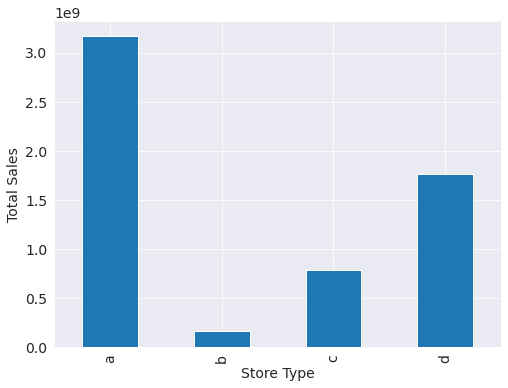

In [ ]:
merged_df.groupby("StoreType")["Sales"].sum().plot(kind="bar")
plt.xlabel('Store Type')
plt.ylabel('Total Sales');

- Stores of type B has the highest average of Sales among others but, we have much less data for StoreType B.

- The stores of type A has higher amount Sales. StoreType D goes on the second place in total sales.

### Assortment

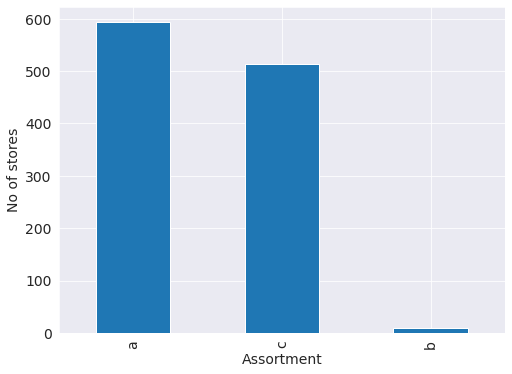

In [ ]:
store_df['Assortment'].value_counts().plot(kind='bar')
plt.xlabel('Assortment')
plt.ylabel('No of stores');

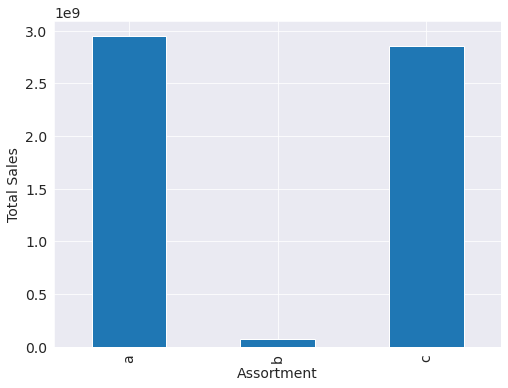

In [ ]:
merged_df.groupby("Assortment")["Sales"].sum().plot(kind="bar")
plt.xlabel('Assortment')
plt.ylabel('Total Sales');

In [ ]:
merged_df.groupby("Assortment")["Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Assortment,,,,,,,,
a,444909.0,6621.017039,2972.500222,0.0,4611.00,6082.0,8000.0,38722.0
b,8212.0,8639.346322,3806.006716,0.0,5604.75,8081.0,11269.5,22137.0
c,391271.0,7300.526339,3184.144215,0.0,5156.00,6675.0,8703.0,41551.0


- The Assortment Type b has highest average sales followed by type c and a.
- The stores of type `a` has high number of stores and has highest total sales.

### Promo2 and PromoInterval

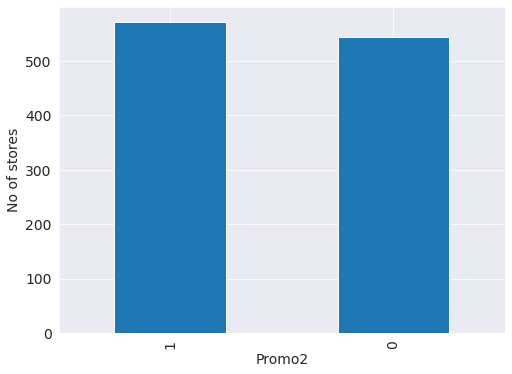

In [ ]:
store_df['Promo2'].value_counts().plot(kind='bar')
plt.xlabel('Promo2')
plt.ylabel('No of stores');

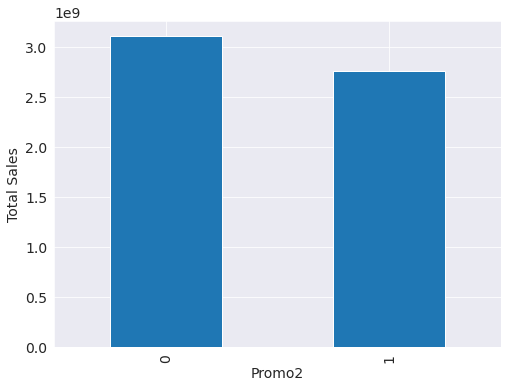

In [ ]:
merged_df.groupby("Promo2")["Sales"].sum().plot(kind="bar")
plt.xlabel('Promo2')
plt.ylabel('Total Sales');


In [ ]:
no_promo2_sales = merged_df.loc[merged_df['Promo2']==0]['Sales'].sum()
promo2_sales = merged_df.loc[merged_df['Promo2']==1]['Sales'].sum()

print(f'The difference in sales of stores with no Promo2 and sales with Promo2 is {no_promo2_sales - promo2_sales}.')

The difference in sales of stores with no Promo2 and sales with Promo2 is 349904633.


- More than Half number of stores are running the promotions.
- It is interesting to note that the total sales of stores that didn't participate in Promo2 is greater than the total of sales of stores which participated in the Promo2. And the difference between the two is pretty big(almost 350 million units).

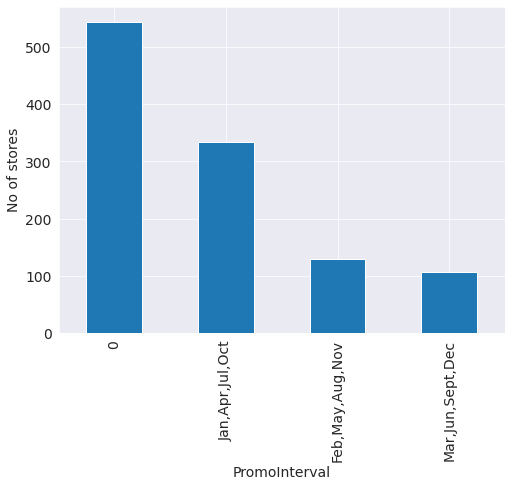

In [ ]:
store_df['PromoInterval'].value_counts().plot(kind='bar')
plt.xlabel('PromoInterval')
plt.ylabel('No of stores');

- Jan,Apr,Jul,Oct is the frequent period for running promotions more number of stores.

### CompetitionDistance

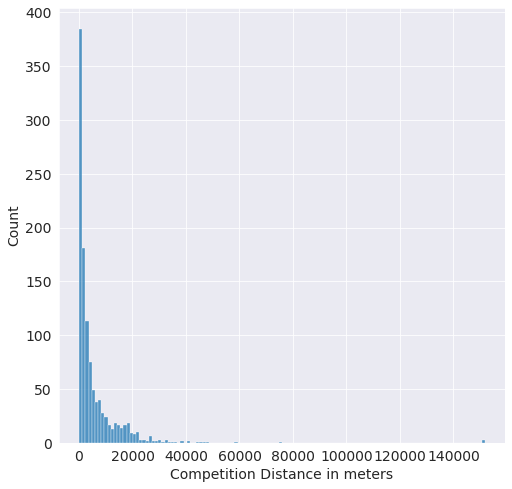

In [ ]:
#Plotting distributi,on of Competition Distance.
plt.figure(figsize=(8,8))
sns.histplot(x=store_df['CompetitionDistance'])
plt.xlabel('Competition Distance in meters')
plt.show();

- In this above figure we can observe that most of the stores have their competition within 5km range.

## Feature Engineering 

- Feature engineering is the process of creating new features (columns) by transforming/combining existing features or by incorporating data from external sources.
- we will analyze some of the features after applying Feature Engineering 

### Sales Features

- we can identify the top outliers and remove them using the IsolationForest.

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
sales_column = merged_df['Sales'].values.reshape(-1, 1)
isolation_forest = IsolationForest(n_estimators=100, contamination=0.001)
isolation_forest.fit(sales_column)

IsolationForest(contamination=0.001)

In [ ]:
merged_df["sales_anamoly_score"] = isolation_forest.decision_function(sales_column)
(merged_df["sales_anamoly_score"] < 0).sum()

666

In [ ]:
merged_df["sales_outliers"] = isolation_forest.predict(sales_column)
(merged_df["sales_outliers"] == -1).sum()

666

In [ ]:
print("The Outliers in the Sales dataset are in the range of ",merged_df[merged_df["sales_outliers"] == -1]["Sales"].min(),merged_df[merged_df["sales_outliers"] == -1]["Sales"].max())

The Outliers in the Sales dataset are in the range of  25444 41551


- The number of this outilers are very low when compared to our dataset, so we will drop them.

In [ ]:
merged_df = merged_df[merged_df["sales_outliers"] == 1]

In [ ]:
merged_df.shape

(843726, 19)

In [ ]:
# Removing Isolation Forest columns
merged_df.drop(['sales_anamoly_score','sales_outliers'],axis = 1, inplace=True)
merged_df.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(843726, 17)

- The distribution of Sales after removing the outliers

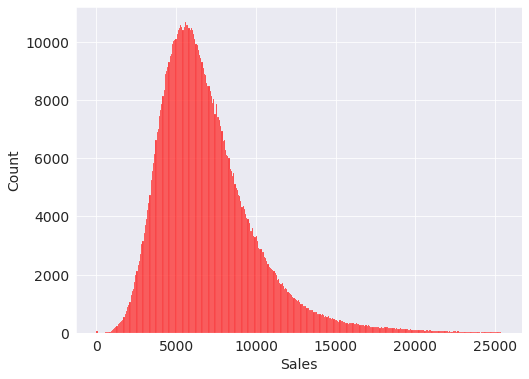

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(merged_df["Sales"], color='r');

- we will also drop the rows with sales = 0, as we have to calulate RMSPE.

In [ ]:
zero_sales_filt = merged_df["Sales"] != 0
merged_df = merged_df[zero_sales_filt]

Average sales per day 

In [ ]:
total_sales_df = pd.DataFrame(merged_df.groupby('Store').agg({'Sales':['sum',"size"]}))
total_sales_df.columns = ['total_sales',"total_open"]


In [ ]:
total_sales_df["Avg_sales_per_day"]= total_sales_df['total_sales']/total_sales_df["total_open"]

In [ ]:
total_sales_df.sort_values(by="Avg_sales_per_day",ascending=False).head(10)

,total_sales,total_open,Avg_sales_per_day
Store,,,
817,12646615,628,20137.921975
1114,14107803,709,19898.170663
262,14975348,789,18980.162231
251,13844639,742,18658.543127
842,10717161,593,18072.784148
513,13581106,759,17893.420290
562,16579245,929,17846.334769
788,13675828,769,17783.911573
383,13356522,775,17234.221935


we can merge this average sales to our dataset on store id

In [ ]:
merged_df = pd.merge(merged_df,total_sales_df["Avg_sales_per_day"], on = 'Store', how = 'left')
merged_test_df = pd.merge(merged_test_df,total_sales_df["Avg_sales_per_day"], on = 'Store', how = 'left')

In [ ]:
merged_df.sample(3)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Avg_sales_per_day
841524,90,4,2013-01-03,6727,901,0,0,1,a,a,330.0,11.0,2007.0,0,NaN,NaN,0,8416.768638
429382,1109,1,2014-03-24,4167,446,0,0,0,c,a,3490.0,4.0,2011.0,1,22.0,2012.0,"Jan,Apr,Jul,Oct",4927.204180
458779,383,4,2014-02-20,17696,2369,1,0,0,a,c,350.0,NaN,NaN,0,NaN,NaN,0,17234.221935


### Date Features

In [ ]:
#Extracting some date features for analysis.
merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Day'] = merged_df['Date'].dt.day
merged_df['WeekOfYear'] = merged_df['Date'].dt.isocalendar().week

In [ ]:
merged_test_df['Year'] = merged_test_df['Date'].dt.year
merged_test_df['Month'] = merged_test_df['Date'].dt.month
merged_test_df['Day'] = merged_test_df['Date'].dt.day
merged_test_df['WeekOfYear'] = merged_test_df['Date'].dt.isocalendar().week

In [ ]:
merged_df['Date'] = merged_df['Date'].dt.strftime('%Y-%m')
merged_test_df['Date'] = merged_test_df['Date'].dt.strftime('%Y-%m')

In [ ]:
# group by date and get average sales, and precent change
average_sales    = merged_df.groupby('Date')["Sales"].mean()
pct_change_sales = merged_df.groupby('Date')["Sales"].sum().pct_change()

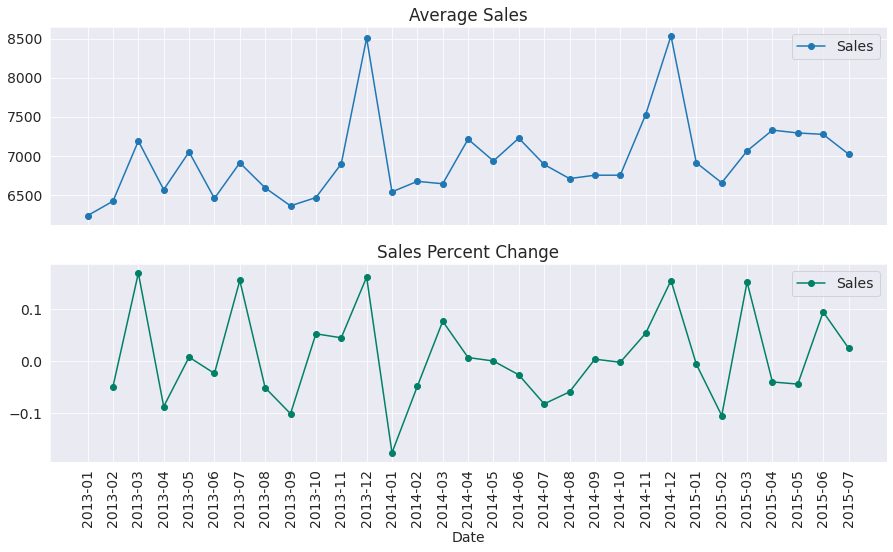

In [ ]:
fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average sales over time(year-month)
ax1 = average_sales.plot(legend=True,
                         ax=axis1,
                         marker='o',
                         title="Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=90)

# plot precent change for sales over time(year-month)
ax2 = pct_change_sales.plot(legend=True,
                            ax=axis2,
                            marker='o',
                            rot=90,
                            colormap="summer",
                            title="Sales Percent Change")

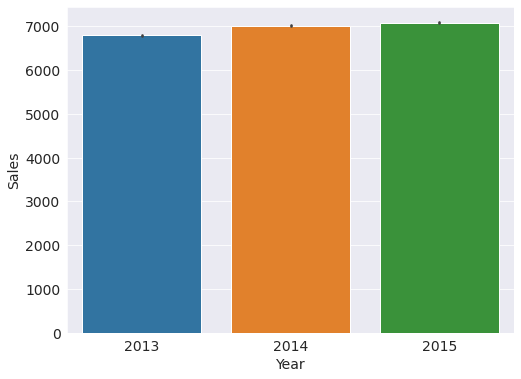

In [ ]:
sns.barplot(data=merged_df, x='Year', y='Sales')

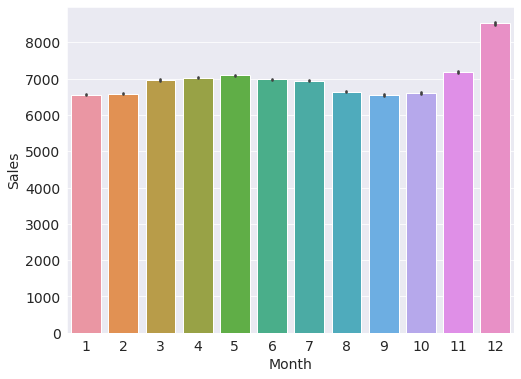

In [ ]:
sns.barplot(data=merged_df, x='Month', y='Sales')

- The Average sales are very high during the time of December, we could guess that the Christmas and New Year lead to increase in sales. 
- As Rossmann Stores sells health and beauty products, it may be guessed that during Christmas and New Year people buy beauty products as they go out to celebrate and, this might the cause of sudden increase in sales.
- The Average sales is also increased each year.

### Competition Features

Next, we can use the columns CompetitionOpenSince[Month/Year] columns from store_df to compute the number of months for which a competitor has been open near the store

In [ ]:
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [ ]:
comp_months(merged_df)
comp_months(merged_test_df)

In [ ]:
merged_df.sample(10).T

,189647,682163,447576,751192,437586,281434,663872,381266,811800,494188
Store,159,462,321,946,369,917,27,13,331,126
DayOfWeek,4,3,2,4,5,5,1,4,1,2
Date,2015-01,2013-06,2014-03,2013-04,2014-03,2014-09,2013-07,2014-05,2013-02,2014-01
Sales,9196,4221,6427,4362,5769,6803,16518,3563,10448,4542
Customers,773,571,599,579,499,860,1534,286,1235,475
Promo,1,0,1,1,0,0,1,0,1,0
StateHoliday,0,0,0,0,0,0,0,0,0,0
SchoolHoliday,0,0,0,0,0,0,0,0,0,0
StoreType,d,a,c,a,d,a,a,d,a,d
Assortment,a,a,c,a,c,a,a,a,c,a


### Promo features

In [ ]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [ ]:
promo_cols(merged_df)
promo_cols(merged_test_df)

### Impute missing numerical data

In [ ]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Avg_sales_per_day', 'Year',
       'Month', 'Day', 'WeekOfYear', 'CompetitionOpen', 'Promo2Open',
       'IsPromo2Month'],
      dtype='object')

In [ ]:
numeric_cols = ["Store","CompetitionDistance","CompetitionOpen","Day","Month","WeekOfYear","Promo2",'Avg_sales_per_day',"Promo2Open","Promo","IsPromo2Month","SchoolHoliday"]
categorical_cols = ["DayOfWeek","StateHoliday","Assortment","StoreType"]


In [ ]:
merged_df[numeric_cols].isna().sum()

Store                  0
CompetitionDistance    0
CompetitionOpen        0
Day                    0
Month                  0
WeekOfYear             0
Promo2                 0
Avg_sales_per_day      0
Promo2Open             0
Promo                  0
IsPromo2Month          0
SchoolHoliday          0
dtype: int64

In [ ]:
merged_test_df[numeric_cols].isna().sum()

Store                  0
CompetitionDistance    0
CompetitionOpen        0
Day                    0
Month                  0
WeekOfYear             0
Promo2                 0
Avg_sales_per_day      0
Promo2Open             0
Promo                  0
IsPromo2Month          0
SchoolHoliday          0
dtype: int64

- No features have the missing data, we have filled the CompetitionDistance during the data cleaning

### Scale Numeric Values

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaling_features = ['Store','Day','Month','WeekOfYear','CompetitionDistance','CompetitionOpen','Avg_sales_per_day','Promo2Open']

In [ ]:
scaler = StandardScaler().fit(merged_df[scaling_features])

In [ ]:
merged_df[scaling_features] = scaler.transform(merged_df[scaling_features])
merged_test_df[scaling_features] = scaler.transform(merged_test_df[scaling_features])

### Encode Categorical Columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(merged_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [ ]:
merged_df[encoded_cols] = encoder.transform(merged_df[categorical_cols])
merged_test_df[encoded_cols] = encoder.transform(merged_test_df[categorical_cols])

- The correlation between the features to the sales.

In [ ]:
corr_columns = numeric_cols + encoded_cols + ["Sales"]
corr_matrix = merged_df[corr_columns].corr()
corr_matrix["Sales"].sort_values(ascending=False)

Sales                  1.000000
Avg_sales_per_day      0.772262
Promo                  0.373297
DayOfWeek_1            0.179624
StoreType_b            0.137707
Assortment_c           0.105901
WeekOfYear             0.072910
Month                  0.072072
Assortment_b           0.055457
SchoolHoliday          0.039506
DayOfWeek_2            0.020366
DayOfWeek_5            0.018027
DayOfWeek_7            0.012326
StateHoliday_a         0.010450
StateHoliday_b         0.007902
Store                  0.007126
StateHoliday_c         0.005734
StoreType_c           -0.001270
CompetitionOpen       -0.002831
StoreType_a           -0.011688
StateHoliday_0        -0.013866
DayOfWeek_4           -0.025727
StoreType_d           -0.026392
DayOfWeek_3           -0.032204
CompetitionDistance   -0.041667
Day                   -0.053073
Promo2Open            -0.059477
IsPromo2Month         -0.064388
Assortment_a          -0.116673
Promo2                -0.126002
DayOfWeek_6           -0.159391
Name: Sa

## Data Preparation

In [ ]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Avg_sales_per_day', 'Year',
       'Month', 'Day', 'WeekOfYear', 'CompetitionOpen', 'Promo2Open',
       'IsPromo2Month', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'Assortment_a', 'Assortment_b', 'Assortment_c', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'StoreType_d'],
      dtype='object')

In [ ]:
to_shuffle = False

In [ ]:
input_cols = numeric_cols + encoded_cols
target_cols = ['Sales']

In [ ]:
if to_shuffle:
    merged_df_shuffled = merged_df.sample(frac=1)
    inputs = merged_df_shuffled[input_cols].copy()
    targets = merged_df_shuffled[target_cols].copy()
else: 
    inputs = merged_df[input_cols].copy()
    targets = merged_df[target_cols].copy()

In [ ]:
test_inputs = merged_test_df[input_cols].copy()

In [ ]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843672 entries, 0 to 843671
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                843672 non-null  float64
 1   CompetitionDistance  843672 non-null  float64
 2   CompetitionOpen      843672 non-null  float64
 3   Day                  843672 non-null  float64
 4   Month                843672 non-null  float64
 5   WeekOfYear           843672 non-null  float64
 6   Promo2               843672 non-null  int64  
 7   Avg_sales_per_day    843672 non-null  float64
 8   Promo2Open           843672 non-null  float64
 9   Promo                843672 non-null  int64  
 10  IsPromo2Month        843672 non-null  int64  
 11  SchoolHoliday        843672 non-null  int64  
 12  DayOfWeek_1          843672 non-null  float64
 13  DayOfWeek_2          843672 non-null  float64
 14  DayOfWeek_3          843672 non-null  float64
 15  DayOfWeek_4      

In [ ]:
inputs.shape

(843672, 30)

In [ ]:
test_inputs.shape

(41088, 30)

In [ ]:
test_inputs.to_parquet("test_inputs.parquet")

In [ ]:
targets.shape

(843672, 1)

Train and validation split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(inputs, targets, test_size=0.25, random_state=42)

In [ ]:
X_train.shape,y_train.shape

((632754, 30), (632754, 1))

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632754 entries, 358298 to 121958
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                632754 non-null  float64
 1   CompetitionDistance  632754 non-null  float64
 2   CompetitionOpen      632754 non-null  float64
 3   Day                  632754 non-null  float64
 4   Month                632754 non-null  float64
 5   WeekOfYear           632754 non-null  float64
 6   Promo2               632754 non-null  int64  
 7   Avg_sales_per_day    632754 non-null  float64
 8   Promo2Open           632754 non-null  float64
 9   Promo                632754 non-null  int64  
 10  IsPromo2Month        632754 non-null  int64  
 11  SchoolHoliday        632754 non-null  int64  
 12  DayOfWeek_1          632754 non-null  float64
 13  DayOfWeek_2          632754 non-null  float64
 14  DayOfWeek_3          632754 non-null  float64
 15  DayOfWeek_4 

In [ ]:
X_val.shape,y_val.shape

((210918, 30), (210918, 1))

- saving the loading the files

In [ ]:
!pip install pyarrow 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
y_val = pd.read_parquet("./y-val.parquet")
X_val = pd.read_parquet("./X-val.parquet")
X_train = pd.read_parquet("./X-train.parquet")
y_train = pd.read_parquet("./y-train.parquet")
test_inputs = pd.read_parquet("./test_inputs.parquet")

## Data Modelling

First we will define the evaluation metric function and some helper functions.

In [ ]:
#The Evaluation Metric
def RMSPE(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
    y_true = np.array(y_true).reshape(-1)
    y_pred = np.array(y_pred).reshape(-1)
    if not y_true.shape == y_pred.shape:
        return "Mismatch between size of y_true and y_true"
    loss = np.sqrt(np.mean(np.square(((np.array(y_true) - y_pred) / y_true)), axis=0))
    return loss

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

def metrics(y_true, y_pred):
    scores = {
        "RMSE" : mean_squared_error(y_true, y_pred, squared=False),
        "R2 Score" : r2_score(y_true, y_pred),
        "RMSPE" : RMSPE(y_true, y_pred)
    }

    return scores

In [ ]:
def try_model(estimator_class,**params):
    model = estimator_class(**params)
    model.fit(X_train,y_train.values.ravel())
    y_train_preds = model.predict(X_train)
    y_val_preds = model.predict(X_val)
    train_metrics = metrics(y_train, y_train_preds)
    val_metrics = metrics(y_val, y_val_preds)
    print(f"The Training set metrics are :{train_metrics.items()}")
    print(f"The Validation set metrics are :{val_metrics.items()}")
    return model,train_metrics,val_metrics

### Statistical Model

In [ ]:
import statsmodels.api as sm

In [ ]:
stats_model_inputs = inputs.drop(["Store"],axis=1)

In [ ]:
X = sm.add_constant(inputs)
y = targets
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                 1.069e+05
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:03:31   Log-Likelihood:            -7.3471e+06
No. Observations:              843574   AIC:                         1.469e+07
Df Residuals:                  843547   BIC:                         1.469e+07
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.929e+13   4.49e+13      0.652      0.514   -5.87e+13    1.17e+14
Store                   1.5272      1.603      0.953      0.341      -1.614       4.669
CompetitionDistance     1.4510      1.641      0.884      0.377      -1.765       4.667
CompetitionOpen        11.8524      1.607      7.374      0.000       8.702      15.003
Day                   -14.0835      1.645     -8.560      0.000     -17.308     -10.859
Month                 185.8150      5.967     31.139      0.000     174.119     197.511
WeekOfYear             16.3659      5.947      2.752      0.006       4.710      28.022
Promo2                -58.6719      4.620    -12.699      0.000     -67.727     -49.617
Avg_sales_per_day    2346.6200      1.679   1397.881      0.000    2343.330    2349.910
Promo2Open             73.7487      2.238     32.960      0.000      69.363      78.134
Promo                2281.0859      3.578    637.537      0.000    2274.073    2288.099
IsPromo2Month         -97.2119      4.996    -19.457      0.000    -107.004     -87.419
SchoolHoliday         144.0472      4.211     34.209      0.000     135.794     152.300
DayOfWeek_1          5.245e+12   8.04e+12      0.652      0.514   -1.05e+13     2.1e+13
DayOfWeek_2          5.245e+12   8.04e+12      0.652      0.514   -1.05e+13     2.1e+13
DayOfWeek_3          5.245e+12   8.04e+12      0.652      0.514   -1.05e+13     2.1e+13
DayOfWeek_4          5.245e+12   8.04e+12      0.652      0.514   -1.05e+13     2.1e+13
DayOfWeek_5          5.245e+12   8.04e+12      0.652      0.514   -1.05e+13     2.1e+13
DayOfWeek_6          5.245e+12   8.04e+12      0.652      0.514   -1.05e+13     2.1e+13
DayOfWeek_7          5.245e+12   8.04e+12      0.652      0.514   -1.05e+13     2.1e+13
StateHoliday_0      -8.457e+13    1.3e+14     -0.652      0.514   -3.39e+14    1.69e+14
StateHoliday_a      -8.457e+13    1.3e+14     -0.652      0.514   -3.39e+14    1.69e+14
StateHoliday_b      -8.457e+13    1.3e+14     -0.652      0.514   -3.39e+14    1.69e+14
StateHoliday_c      -8.457e+13    1.3e+14     -0.652      0.514   -3.39e+14    1.69e+14
Assortment_a         3.629e+13   5.56e+13      0.652      0.514   -7.27e+13    1.45e+14
Assortment_b         3.629e+13   5.56e+13      0.652      0.514   -7.27e+13    1.45e+14
Assortment_c         3.629e+13   5.56e+13      0.652      0.514   -7.27e+13    1.45e+14
StoreType_a          1.375e+13   2.11e+13      0.652      0.514   -2.75e+13     5.5e+13
StoreType_b          1.375e+13   2.11e+13      0.652      0.514   -2.75e+13     5.5e+13
StoreType_c          1.375e+13   2.11e+13      0.652      0.514   -2.75e+13     5.5e+13
StoreType_d          1.375e+13   2.11e+13      0.652      0.514   -2.75e+13     5.5e+13
==============================================================================
Omnibus:    

In [ ]:
metrics(y,y_pred)

{'RMSE': 1466.4611135605437,
 'R2 Score': 0.7671244105998114,
 'RMSPE': 0.3113755960125174}

- According to this we can build a good regression model with an 76 percent accuracy. There are some fetures that have negative impact on the linear model which can be addressed with regularization and tree models

### Basleline Models

#### MeanRegressor
This will return mean values for all the predictions

In [ ]:
class MeanRegressor:
  def fit(self,inputs, targets):
    self.mean =np.mean(targets)
  
  def predict(self, inputs):
    return np.full(inputs.shape[0] , self.mean)

 

In [ ]:
mean_model,mean_train_metrics,mean_val_metrics = try_model(MeanRegressor)

The Training set metrics are :dict_items([('RMSE', 3038.174412565663), ('R2 Score', 0.0), ('RMSPE', 0.6401881155211965)])
The Validation set metrics are :dict_items([('RMSE', 3040.8581762229433), ('R2 Score', -4.6928125767564666e-06), ('RMSPE', 0.6052809735297511)])


### LinearModels

In [ ]:
from sklearn.linear_model import LinearRegression,ElasticNet,RidgeCV,LassoCV,SGDRegressor


LinearRegression

In [ ]:
%%time
LR_model,LR_train_metrics,LR_val_metrics = try_model(LinearRegression)

The Training set metrics are :dict_items([('RMSE', 1466.0139130631346), ('R2 Score', 0.7671636512043882), ('RMSPE', 0.3258165680003978)])
The Validation set metrics are :dict_items([('RMSE', 1467.8395005681093), ('R2 Score', 0.766994137228965), ('RMSPE', 0.26271801894505104)])
CPU times: user 1.41 s, sys: 219 ms, total: 1.63 s
Wall time: 1.02 s


- Our base Linear Regression Model is performs very well when compared to our Dummy model MeanRegressor

Linear Regression with Regularization

- we will use ElasticNet Regularization and tune the l1_ratio to get the L1(Lasso Regularization) and L2 (Ridge Regularization)

In [ ]:
%%time
#Default L1 ratio is 0.5
ENR_model,ENR_train_metrics,ENR_val_metrics = try_model(ElasticNet)

The Training set metrics are :dict_items([('RMSE', 1853.6131141050773), ('R2 Score', 0.6277687907742868), ('RMSPE', 0.40469391010508365)])
The Validation set metrics are :dict_items([('RMSE', 1856.7669878825639), ('R2 Score', 0.6271582657777132), ('RMSPE', 0.3527743284797764)])
CPU times: user 1.03 s, sys: 199 ms, total: 1.23 s
Wall time: 716 ms


- The ElasticNet Regularization with l1_ratio has performed worse than our Linear Model.
- We can set the l1_ratio to 0, Now the penalty is an L2 penalty (Ridge). But the Ridge methods are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV. 

In [ ]:
%%time
ridge_model,ridge_train_metrics,ridge_val_metrics = try_model(RidgeCV)

The Training set metrics are :dict_items([('RMSE', 1466.0140135352358), ('R2 Score', 0.767163619289878), ('RMSPE', 0.32581735275424634)])
The Validation set metrics are :dict_items([('RMSE', 1467.8367722796972), ('R2 Score', 0.7669950034089585), ('RMSPE', 0.2627204128932399)])
CPU times: user 2.89 s, sys: 601 ms, total: 3.49 s
Wall time: 2.66 s


- The ridge model is similar to our Linear Model and perfomed better to ElasticNet model with l1_ratio = 0.5.
- We can set the l1_ratio to 1.0, Now the penalty is an L1 penalty (Lasso). But the Lasso methods are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Lasso/LassoCV.

In [ ]:
%%time
lasso_model,lasso_train_metrics,lasso_val_metrics = try_model(LassoCV)

The Training set metrics are :dict_items([('RMSE', 1466.3250500283548), ('R2 Score', 0.7670648094651311), ('RMSPE', 0.3244165774583762)])
The Validation set metrics are :dict_items([('RMSE', 1468.1360640395314), ('R2 Score', 0.7668999743342999), ('RMSPE', 0.2614979087585242)])
CPU times: user 7.22 s, sys: 1.35 s, total: 8.57 s
Wall time: 7.16 s


- The metrics are similar to Linear model. we can increase the penalty for the Regularization. But first we will try some the other models. 

Gradient Descent Methods

- SGDregressor

In [ ]:
%%time
SGD_model,SGD_train_metrics,SGD_val_metrics = try_model(SGDRegressor)

The Training set metrics are :dict_items([('RMSE', 1466.4479815870632), ('R2 Score', 0.7670257508861583), ('RMSPE', 0.3250778275061207)])
The Validation set metrics are :dict_items([('RMSE', 1468.3539379496763), ('R2 Score', 0.766830784313448), ('RMSPE', 0.26209814948593824)])
CPU times: user 6.68 s, sys: 129 ms, total: 6.81 s
Wall time: 6.66 s


- SGDRegressor with L1 penalty

In [ ]:
%%time
SGDL1_model,SGDL1_train_metrics,SGDL1_val_metrics = try_model(SGDRegressor,penalty="l1")

The Training set metrics are :dict_items([('RMSE', 1466.450149799448), ('R2 Score', 0.7670250619588563), ('RMSPE', 0.3240570025612629)])
The Validation set metrics are :dict_items([('RMSE', 1468.2996460789775), ('R2 Score', 0.766848026694249), ('RMSPE', 0.26142768634005054)])
CPU times: user 8.99 s, sys: 117 ms, total: 9.1 s
Wall time: 8.92 s


### Tree Models

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from xgboost import XGBRegressor

- DecisionTreeRegressor

In [ ]:
%%time
Dtree,Dtree_train_metrics,Dtree_val_metrics = try_model(DecisionTreeRegressor,random_state=42)

The Training set metrics are :dict_items([('RMSE', 0.0), ('R2 Score', 1.0), ('RMSPE', 0.0)])
The Validation set metrics are :dict_items([('RMSE', 1134.579356155566), ('R2 Score', 0.860787106009983), ('RMSPE', 0.18430804931148168)])
CPU times: user 10.8 s, sys: 54.7 ms, total: 10.8 s
Wall time: 11.3 s


- RandomForestRegressor

In [ ]:
%%time
RFreg,RFreg_train_metrics,RFreg_val_metrics = try_model(RandomForestRegressor,random_state=42)

The Training set metrics are :dict_items([('RMSE', 302.38997973339326), ('R2 Score', 0.9901609559179687), ('RMSPE', 0.07794209493905668)])
The Validation set metrics are :dict_items([('RMSE', 799.8672143346613), ('R2 Score', 0.9310091414159017), ('RMSPE', 0.13330924465474842)])
CPU times: user 12min 40s, sys: 8.77 s, total: 12min 48s
Wall time: 12min 54s


- Light GBM

In [ ]:
%%time
Lgbm_model,Lgbm_train_metrics,Lgbm_val_metrics = try_model(lgb.LGBMRegressor,random_state=42)

The Training set metrics are :dict_items([('RMSE', 1043.073166663701), ('R2 Score', 0.8821297667857637), ('RMSPE', 0.2546228483730491)])
The Validation set metrics are :dict_items([('RMSE', 1048.4625276352535), ('R2 Score', 0.8811181557490143), ('RMSPE', 0.19399280716778655)])
CPU times: user 21 s, sys: 158 ms, total: 21.1 s
Wall time: 11.1 s


- XGboost

In [ ]:
%%time
Xgb_model,Xgb_train_metrics,Xgb_val_metrics = try_model(XGBRegressor,random_state=42)

[04:08:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The Training set metrics are :dict_items([('RMSE', 1218.587073999634), ('R2 Score', 0.8457100813834996), ('RMSPE', 0.29826372885746555)])
The Validation set metrics are :dict_items([('RMSE', 1215.5678169624584), ('R2 Score', 0.8470595400085921), ('RMSPE', 0.2354523618757418)])
CPU times: user 1min 9s, sys: 438 ms, total: 1min 9s
Wall time: 1min 10s


- The tree based models have outperformed the Linear models with just the default Hyperparameters. we can improve these futher by tuning the Hyperparameters.

In [ ]:
jovian.commit(project="rossman-sales-prediction")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/vasanthsai26/rossman-sales-prediction


'https://jovian.ai/vasanthsai26/rossman-sales-prediction'

## Hyperparameter Tuning


we will tune the Hyperparameters By hand,RandomisedSearchCV and GridSearchCV methods to identify the best Hyperparameters. 

### DecisionTreeRegressor

In [ ]:
Dtree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

- First we will see the max values that the tree has trained

In [ ]:
Dtree.get_depth()

48

In [ ]:
Dtree.get_n_leaves()

632012

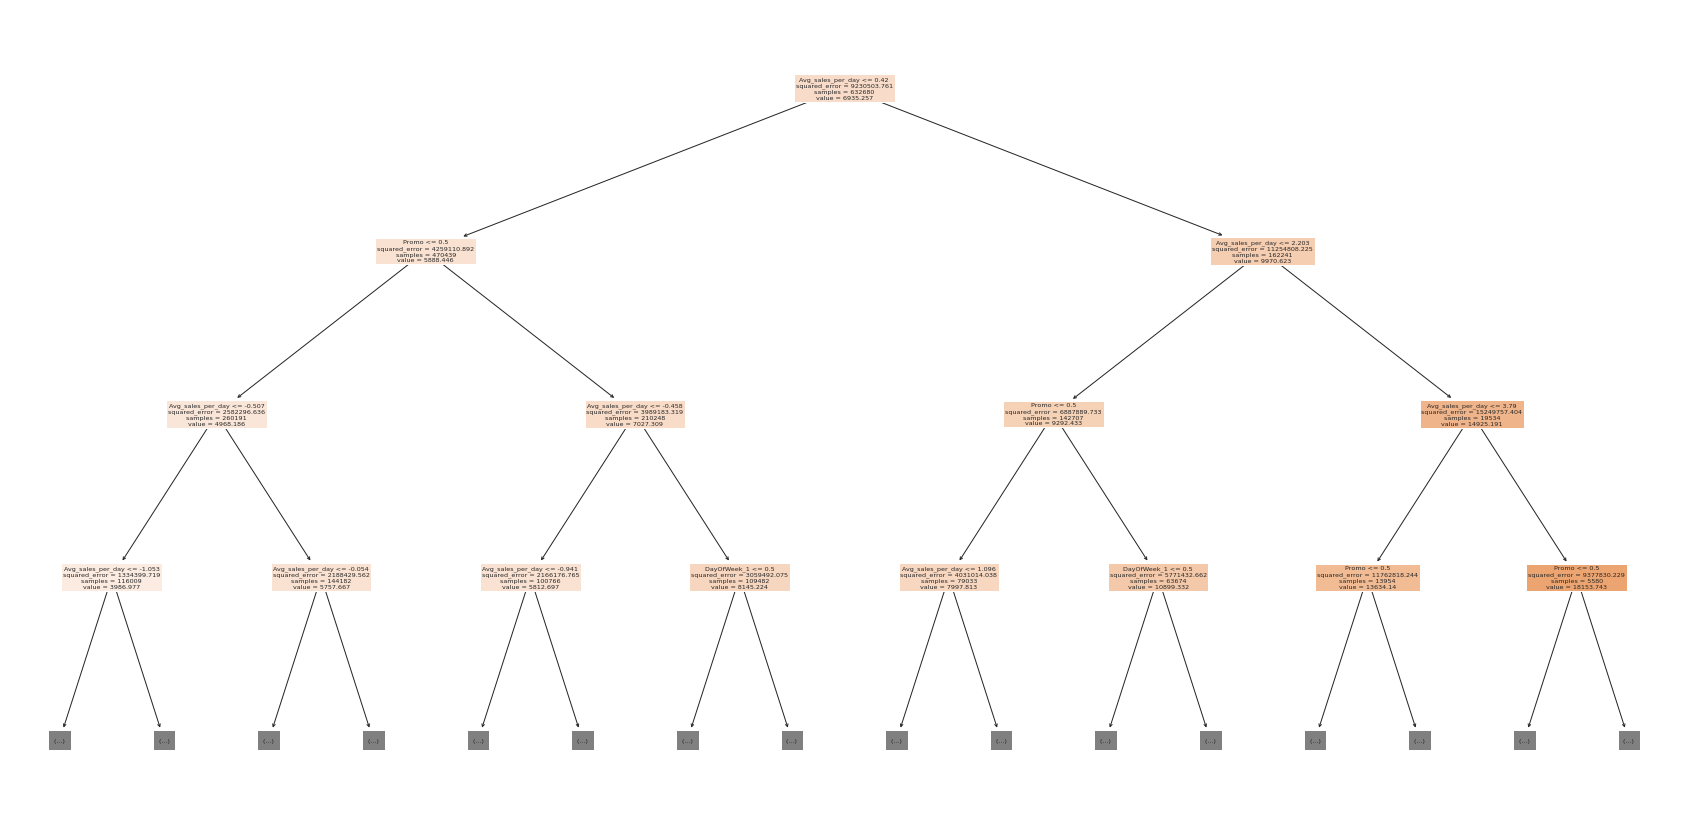

In [ ]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(30,15))
# Visualize the tree graphically using plot_tree
plot_tree(Dtree,feature_names=X_train.columns,max_depth=3,filled=True);

- These are the default Hyperparameters for the DecisionTreeRegressor. we will tune this Hyperparameters

In [ ]:
def test_params(**params):
    model = DecisionTreeRegressor(random_state=42, **params).fit(X_train, y_train)
    train_rmse = mean_squared_error(model.predict(X_train), y_train, squared=False)
    val_rmse = mean_squared_error(model.predict(X_val), y_val, squared=False)
    return train_rmse, val_rmse

def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

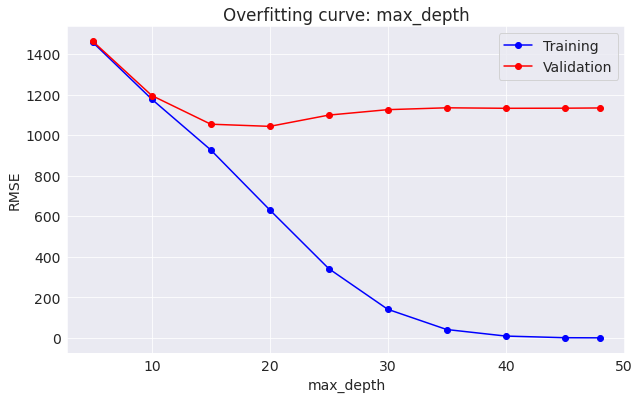

In [ ]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35,40,45,48])

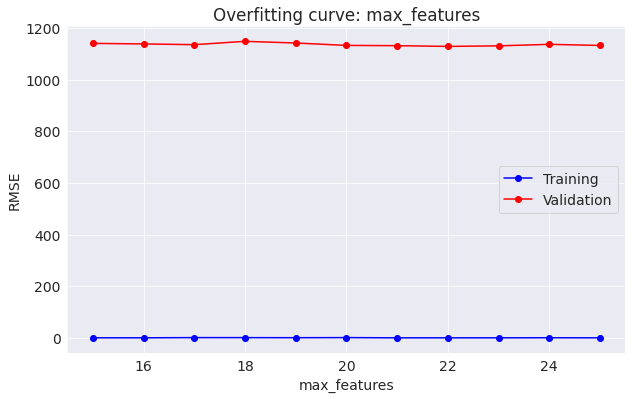

In [ ]:
test_param_and_plot('max_features', list(np.arange(15,26)))

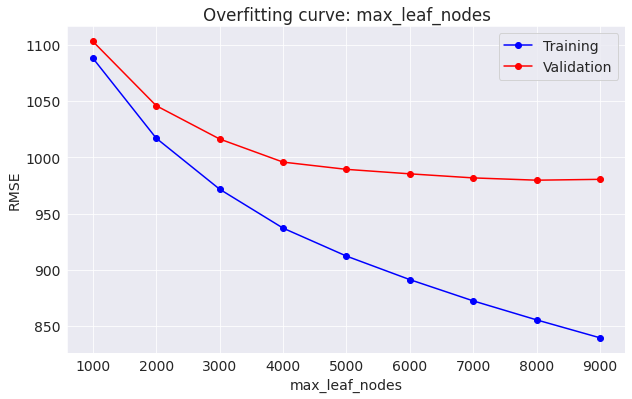

In [ ]:
test_param_and_plot('max_leaf_nodes', list(np.arange(1000,10000,1000)))

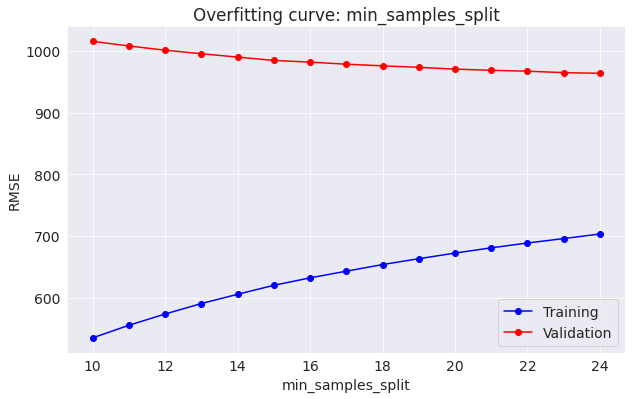

In [ ]:
test_param_and_plot('min_samples_split', list(np.arange(10,25)))

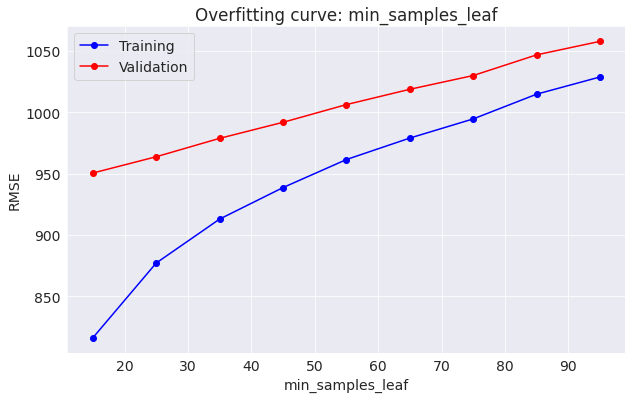

In [ ]:
test_param_and_plot('min_samples_leaf', list(np.arange(15,100,10)))

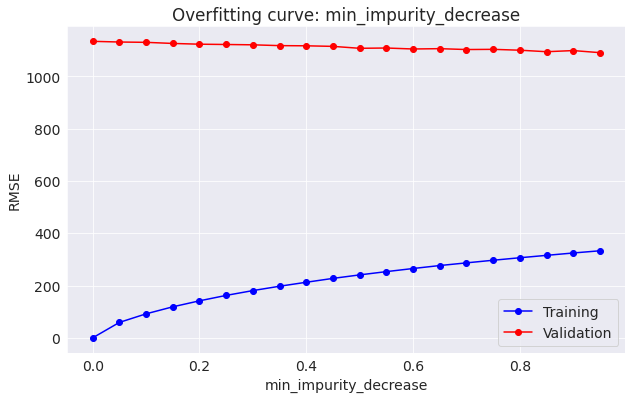

In [ ]:
test_param_and_plot('min_impurity_decrease', list(np.arange(0.0,1.0,0.05)))

- RandomisedSearchCV

In [ ]:
params = {#'criterion': ['squared_error','absolute_error', 'poisson'],
 'max_depth': [14,15,16,17],
 'max_features': ['auto', 'sqrt','log2',15,16,17],
 'max_leaf_nodes': list(np.arange(1000,10000,1000)),
 'min_impurity_decrease': [0.0,0.05,0.1,0.15,0.2],
 'min_samples_leaf': [1,2,3,5,7,10,12,15],
 'min_samples_split': [2,3,4,5]
 }

In [ ]:
Dtree_model = DecisionTreeRegressor(random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rscv_dtree_model = RandomizedSearchCV(estimator = Dtree_model,
                                      param_distributions=params,
                                      n_iter=50,
                                      #n_jobs=-1,
                                      cv=5,
                                      verbose=2)

In [ ]:
%%time
rscv_dtree_model.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=16, max_features=16, max_leaf_nodes=5000, min_impurity_decrease=0.05, min_samples_leaf=7, min_samples_split=2; total time=   3.6s
[CV] END max_depth=16, max_features=16, max_leaf_nodes=5000, min_impurity_decrease=0.05, min_samples_leaf=7, min_samples_split=2; total time=   3.6s
[CV] END max_depth=16, max_features=16, max_leaf_nodes=5000, min_impurity_decrease=0.05, min_samples_leaf=7, min_samples_split=2; total time=   3.5s
[CV] END max_depth=16, max_features=16, max_leaf_nodes=5000, min_impurity_decrease=0.05, min_samples_leaf=7, min_samples_split=2; total time=   3.6s
[CV] END max_depth=16, max_features=16, max_leaf_nodes=5000, min_impurity_decrease=0.05, min_samples_leaf=7, min_samples_split=2; total time=   3.5s
[CV] END max_depth=17, max_features=16, max_leaf_nodes=5000, min_impurity_decrease=0.0, min_samples_leaf=7, min_samples_split=2; total time=   3.6s
[CV] END max_depth=17, max_features=16, max_l

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [14, 15, 16, 17],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         15, 16, 17],
                                        'max_leaf_nodes': [1000, 2000, 3000,
                                                           4000, 5000, 6000,
                                                           7000, 8000, 9000],
                                        'min_impurity_decrease': [0.0, 0.05,
                                                                  0.1, 0.15,
                                                                  0.2],
                                        'min_samples_leaf': [1, 2, 3, 5, 7, 10,
                                                             12, 15],
                                        'min_samples_split': [2, 

In [ ]:
rscv_dtree_model.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 15,
 'min_impurity_decrease': 0.1,
 'max_leaf_nodes': 8000,
 'max_features': 16,
 'max_depth': 17}

In [ ]:
rscv_dtree_model.best_score_

0.885311318225968

- GridSearchCV

In [ ]:
grid_params = {
 'min_samples_split': [3],
 'min_samples_leaf': [9,10,11],
 'min_impurity_decrease':[0.15,0.16],
 'max_leaf_nodes':[7500,8000,8500],
 'max_features': [17],
 'max_depth': [16,17,18]
}


In [ ]:
from sklearn.model_selection import GridSearchCV
gcv_dtree_model = GridSearchCV(estimator = Dtree_model,
                                      param_grid=grid_params,
                                      #n_iter=50,
                                      #n_jobs=-1,
                                      cv=5,
                                      verbose=2)

In [ ]:
%%time
gcv_dtree_model.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=16, max_features=17, max_leaf_nodes=7500, min_impurity_decrease=0.15, min_samples_leaf=9, min_samples_split=3; total time=   3.7s
[CV] END max_depth=16, max_features=17, max_leaf_nodes=7500, min_impurity_decrease=0.15, min_samples_leaf=9, min_samples_split=3; total time=   3.6s
[CV] END max_depth=16, max_features=17, max_leaf_nodes=7500, min_impurity_decrease=0.15, min_samples_leaf=9, min_samples_split=3; total time=   3.5s
[CV] END max_depth=16, max_features=17, max_leaf_nodes=7500, min_impurity_decrease=0.15, min_samples_leaf=9, min_samples_split=3; total time=   3.6s
[CV] END max_depth=16, max_features=17, max_leaf_nodes=7500, min_impurity_decrease=0.15, min_samples_leaf=9, min_samples_split=3; total time=   3.5s
[CV] END max_depth=16, max_features=17, max_leaf_nodes=7500, min_impurity_decrease=0.15, min_samples_leaf=10, min_samples_split=3; total time=   3.6s
[CV] END max_depth=16, max_features=17, max

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [16, 17, 18], 'max_features': [17],
                         'max_leaf_nodes': [7500, 8000, 8500],
                         'min_impurity_decrease': [0.15, 0.16],
                         'min_samples_leaf': [9, 10, 11],
                         'min_samples_split': [3]},
             verbose=2)

In [ ]:
gcv_dtree_model.best_score_

0.8890666454304622

In [ ]:
gcv_dtree_model.best_params_

{'max_depth': 18,
 'max_features': 17,
 'max_leaf_nodes': 8500,
 'min_impurity_decrease': 0.15,
 'min_samples_leaf': 9,
 'min_samples_split': 3}

In [ ]:
params = {'max_depth': 18,
 'max_features': 17,
 'max_leaf_nodes': 8500,
 'min_impurity_decrease': 0.15,
 'min_samples_leaf': 9,
 'min_samples_split': 3}
params["random_state"] = 42
Dtree_best,Dtree_best_train_metrics,Dtree_best_val_metrics = try_model(DecisionTreeRegressor,**params)

The Training set metrics are :dict_items([('RMSE', 917.6094112655876), ('R2 Score', 0.9092482685336774), ('RMSPE', 0.20598494994450253)])
The Validation set metrics are :dict_items([('RMSE', 1008.4329306314061), ('R2 Score', 0.8896986839190524), ('RMSPE', 0.17757486290590405)])


In [ ]:
joblib.dump(Dtree_best, 'Dtree-best-model.joblib')

['Dtree-best-model.joblib']

In [ ]:
Dtree_best = joblib.load('Dtree-best-model.joblib')


### RandomForestRegressor

In [ ]:
RFreg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

- Below are the functions to idenitfy the close to best value of a Hyperparameter.

In [ ]:
def RFR_test_params(**params):
    model = RandomForestRegressor(random_state=42,n_jobs=-1, **params).fit(X_train, y_train.values.ravel())
    train_rmse = mean_squared_error(model.predict(X_train), y_train, squared=False)
    val_rmse = mean_squared_error(model.predict(X_val), y_val, squared=False)
    return train_rmse, val_rmse

def RFR_test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = RFR_test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [ ]:
%%time
model = RandomForestRegressor(random_state=42,n_jobs=-1, max_depth=15).fit(X_train, y_train.values.ravel())

CPU times: user 11min 3s, sys: 798 ms, total: 11min 4s
Wall time: 5min 47s


In [ ]:
metrics(y_train,model.predict(X_train))

{'RMSE': 861.9477567857733,
 'R2 Score': 0.9195110088624288,
 'RMSPE': 0.20097742135839342}

In [ ]:
metrics(y_val,model.predict(X_val))

{'RMSE': 950.6872206236275,
 'R2 Score': 0.9022571452070401,
 'RMSPE': 0.17207979276322563}

cycle started
cycle started
cycle started
cycle started
cycle started


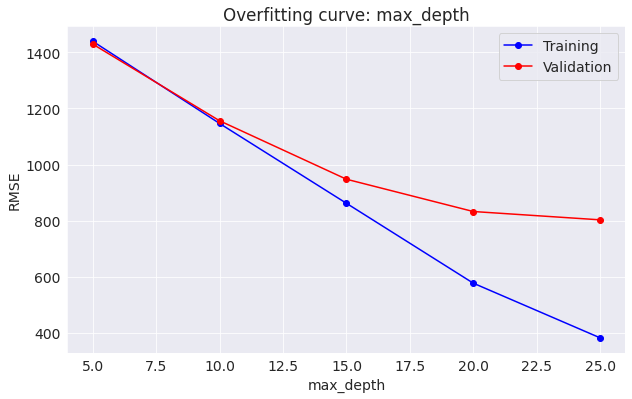

In [ ]:
RFR_test_param_and_plot('max_depth', [5, 10, 15, 20, 25])

cycle started
cycle started
cycle started
cycle started
cycle started
cycle started


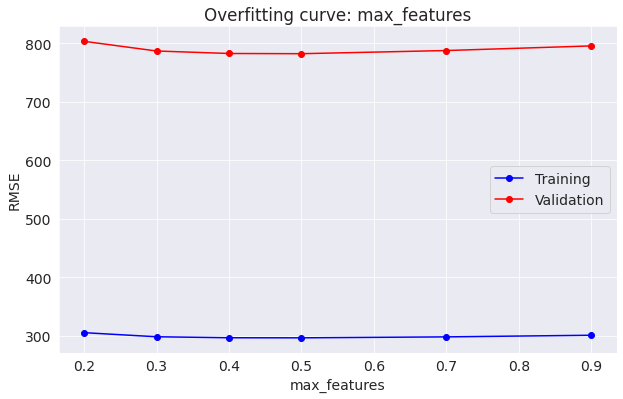

In [ ]:
RFR_test_param_and_plot('max_features', [0.2,0.3, 0.4, 0.5,0.7, 0.9])

cycle started
cycle started
cycle started
cycle started
cycle started
cycle started
cycle started


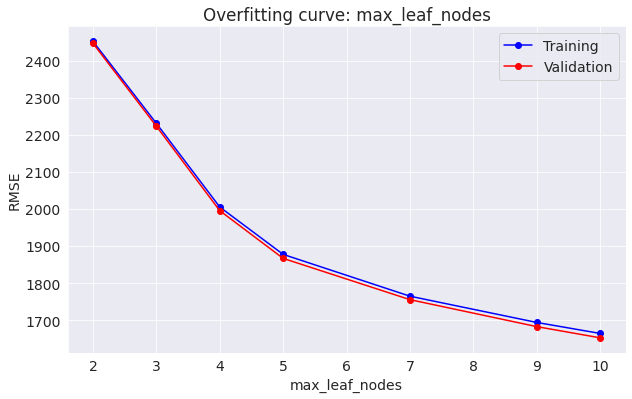

In [ ]:
RFR_test_param_and_plot('max_leaf_nodes', [2,3, 4, 5,7, 9,10])

cycle started
cycle started
cycle started
cycle started


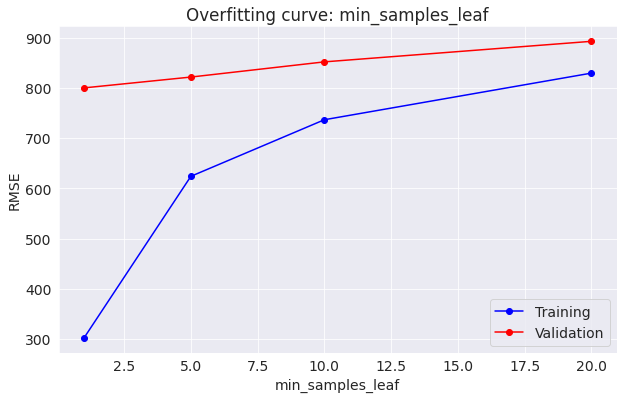

In [ ]:
RFR_test_param_and_plot('min_samples_leaf', [1, 5,10,20])


cycle started
cycle started
cycle started
cycle started


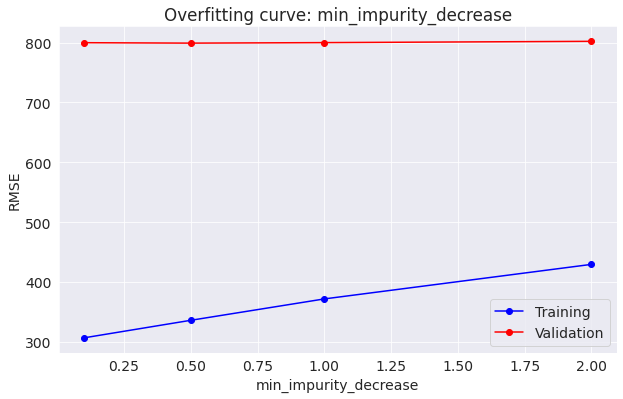

In [ ]:
RFR_test_param_and_plot('min_impurity_decrease', [0.1, 0.5, 1.0,2.0])

cycle started
cycle started
cycle started
cycle started


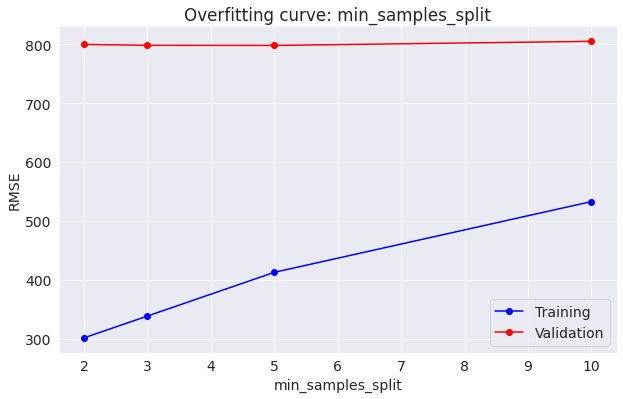

In [ ]:
RFR_test_param_and_plot('min_samples_split', [2, 3, 5,10])

cycle started
cycle started
cycle started
cycle started
cycle started
cycle started
cycle started
cycle started
cycle started
cycle started
cycle started


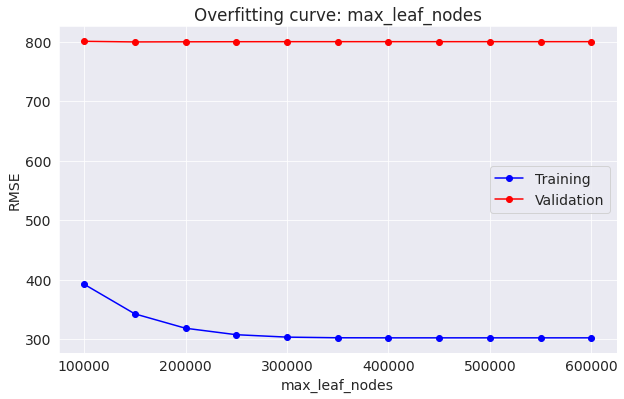

In [ ]:
RFR_test_param_and_plot('max_leaf_nodes', list(np.arange(100000,650000,50000)))

In [ ]:
Rfreg_best_params = {'random_state' : 42,
                     'n_jobs' : -1,
                     'n_estimators': 250,
                     'min_samples_split' : 3,
                     'max_features' : 0.5
}

In [ ]:
%%time
RFR_best,RFR_best_train_metrics,RFR_best_val_metrics = try_model(RandomForestRegressor,**Rfreg_best_params)

The Training set metrics are :dict_items([('RMSE', 346.09902514872783), ('R2 Score', 0.9871110105972847), ('RMSPE', 0.10695030864929196)])
The Validation set metrics are :dict_items([('RMSE', 777.3554588915309), ('R2 Score', 0.9348379013062629), ('RMSPE', 0.13005616398494466)])
CPU times: user 23min 18s, sys: 14.3 s, total: 23min 33s
Wall time: 12min 8s


In [ ]:
import joblib
joblib.dump(RFR_best, 'RFR-best-model.joblib')

['RFR-best-model.joblib']

In [ ]:
RFR_best = joblib.load('RFR-best-model.joblib')


### Light GBM

For Better Accuracy
- Use large max_bin (may be slower)
- Use small learning_rate with large num_iterations
- Use large num_leaves (may cause over-fitting)
- Use bigger training data
- Try dart

Deal with Over-fitting 
- Use small max_bin
- Use small num_leaves
- Use min_data_in_leaf and min_sum_hessian_in_leaf
- Use bagging by set bagging_fraction and bagging_freq
- Use feature sub-sampling by set feature_fraction
- Use bigger training data
- Try lambda_l1, lambda_l2 and min_gain_to_split for regularization
- Try max_depth to avoid growing deep tree
- Try extra_trees
- Try increasing path_smooth

In [ ]:
Lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
def Lgbm_test_params(**params):
    model = lgb.LGBMRegressor(random_state=42,n_jobs=-1,**params).fit(X_train, y_train)
    train_rmse = mean_squared_error(model.predict(X_train), y_train, squared=False)
    val_rmse = mean_squared_error(model.predict(X_val), y_val, squared=False)
    return train_rmse, val_rmse

def Lgbm_test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        print("cycle is started")
        params = {param_name: value}
        train_rmse, val_rmse = Lgbm_test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started


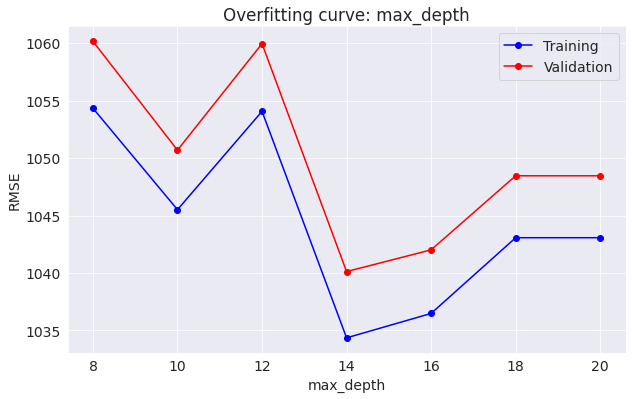

In [ ]:
Lgbm_test_param_and_plot("max_depth",list(np.arange(8,21,2)))

cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
CPU times: user 9min 23s, sys: 1.55 s, total: 9min 25s
Wall time: 9min 21s


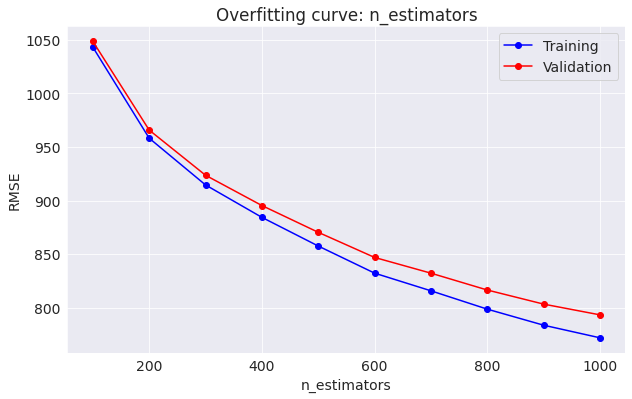

In [ ]:
%%time
Lgbm_test_param_and_plot("n_estimators",list(np.arange(100,1001,100)))

- The RMSE values are keep on decreasing with increase in no of estimators, we will us the max no of estimators after finding all other Hyperparameters.

cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
CPU times: user 3min 42s, sys: 779 ms, total: 3min 42s
Wall time: 3min 41s


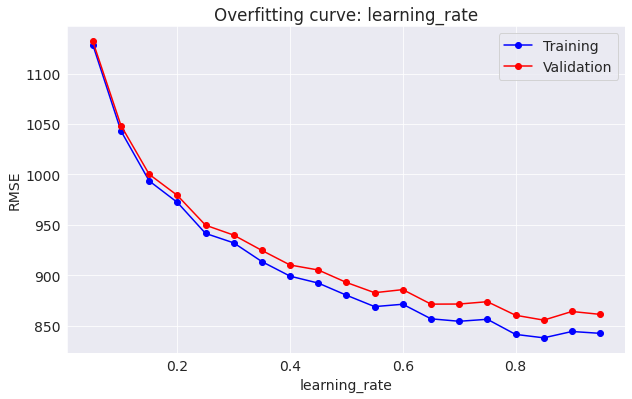

In [ ]:
%%time
Lgbm_test_param_and_plot("learning_rate",list(np.arange(0.05,1.0,0.05)))

cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
cycle is started
CPU times: user 2min 2s, sys: 369 ms, total: 2min 2s
Wall time: 2min 1s


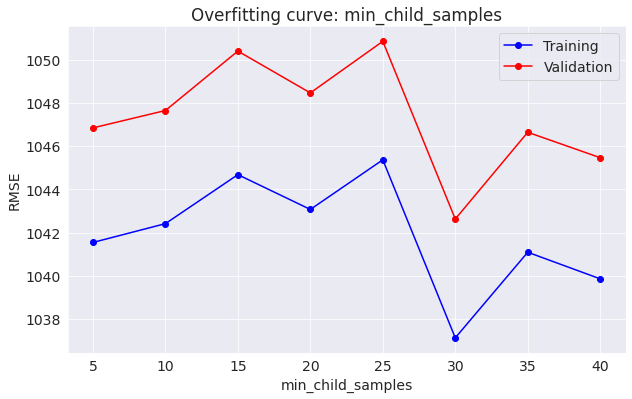

In [ ]:
%%time
Lgbm_test_param_and_plot("min_child_samples",list(np.arange(5,41,5)))

In [ ]:
Lgbm_params = {#'boosting_type': ['gbdt','dart'],
               'max_depth': [-1,10,14,18],
               'n_estimators': [250,500],
               'learning_rate': [0.1,0.2,0.4,0.5],
               'min_child_samples': [20,25,30,40],
               'num_leaves': [31,33,35],
}

In [ ]:
LGBM_tree = lgb.LGBMRegressor(random_state=42,n_jobs=-1)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rscv_lgbm_model = RandomizedSearchCV(estimator = LGBM_tree,
                                      param_distributions=Lgbm_params,
                                      n_iter=50,
                                      cv=3,
                                      verbose=2)

In [ ]:
rscv_lgbm_model.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END learning_rate=0.4, max_depth=10, min_child_samples=20, n_estimators=250, num_leaves=35; total time=  19.9s
[CV] END learning_rate=0.4, max_depth=10, min_child_samples=20, n_estimators=250, num_leaves=35; total time=  13.2s
[CV] END learning_rate=0.4, max_depth=10, min_child_samples=20, n_estimators=250, num_leaves=35; total time=  11.5s
[CV] END learning_rate=0.1, max_depth=14, min_child_samples=30, n_estimators=500, num_leaves=33; total time=  24.8s
[CV] END learning_rate=0.1, max_depth=14, min_child_samples=30, n_estimators=500, num_leaves=33; total time=  26.1s
[CV] END learning_rate=0.1, max_depth=14, min_child_samples=30, n_estimators=500, num_leaves=33; total time=  26.1s
[CV] END learning_rate=0.2, max_depth=10, min_child_samples=25, n_estimators=500, num_leaves=31; total time=  22.1s
[CV] END learning_rate=0.2, max_depth=10, min_child_samples=25, n_estimators=500, num_leaves=31; total time=  21.9s
[CV] END l

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(random_state=42), n_iter=50,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.4, 0.5],
                                        'max_depth': [-1, 10, 14, 18],
                                        'min_child_samples': [20, 25, 30, 40],
                                        'n_estimators': [250, 500],
                                        'num_leaves': [31, 33, 35]},
                   verbose=2)

In [ ]:
rscv_lgbm_model.best_params_

{'num_leaves': 35,
 'n_estimators': 500,
 'min_child_samples': 20,
 'max_depth': 10,
 'learning_rate': 0.5}

In [ ]:
rscv_lgbm_model.best_score_

0.9423156990794572

In [ ]:
LGBM_params = {'num_leaves': 35,
 'n_estimators': 500,
 'min_child_samples': 20,
 'max_depth': 10,
 'learning_rate': 0.5}
LGBM_params["random_state"] = 42
LGBM_params['n_estimators'] = 1500

In [ ]:
LGBM_params

{'num_leaves': 35,
 'n_estimators': 1500,
 'min_child_samples': 20,
 'max_depth': 10,
 'learning_rate': 0.5,
 'random_state': 42}

In [ ]:
%%time
lgbm_best,lgbm_best_train_metrics,lgbm_best_val_metrics = try_model(lgb.LGBMRegressor,**LGBM_params)

The Training set metrics are :dict_items([('RMSE', 552.0526335672279), ('R2 Score', 0.9671526624491559), ('RMSPE', 0.17123116292519017)])
The Validation set metrics are :dict_items([('RMSE', 668.5378881363348), ('R2 Score', 0.9515226684295569), ('RMSPE', 0.13010168564792135)])
CPU times: user 3min 21s, sys: 775 ms, total: 3min 22s
Wall time: 1min 48s


In [ ]:
joblib.dump(lgbm_best, 'lgbm-best-model.joblib')

['lgbm-best-model.joblib']

In [ ]:
lgbm_best = joblib.load('lgbm-best-model.joblib')


### XGBoost

In [ ]:
Xgb_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
def xgbm_test_params(**params):
    model = XGBRegressor(random_state=42,n_jobs=-1,**params).fit(X_train, y_train)
    train_rmse = mean_squared_error(model.predict(X_train), y_train, squared=False)
    val_rmse = mean_squared_error(model.predict(X_val), y_val, squared=False)
    return train_rmse, val_rmse

def xgbm_test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        print("cycle is started")
        params = {param_name: value}
        train_rmse, val_rmse = xgbm_test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

cycle is started
[04:09:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[04:10:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[04:13:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[04:18:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[04:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[04:32:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


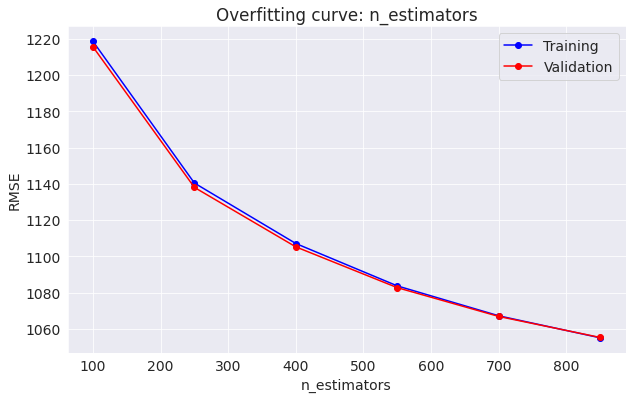

In [ ]:
xgbm_test_param_and_plot('n_estimators',list(np.arange(100,1000,150)))

cycle is started
[04:42:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[04:44:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[04:49:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[04:57:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[05:12:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[05:33:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[06:02:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:square

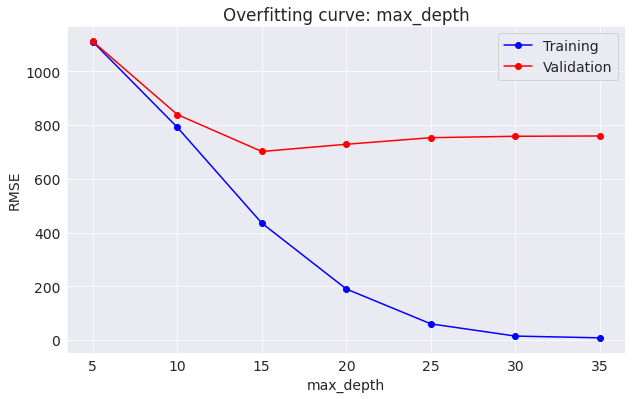

In [ ]:
xgbm_test_param_and_plot('max_depth',list(np.arange(5,40,5)))

cycle is started
[06:37:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[06:39:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[06:40:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[06:41:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[06:42:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[06:43:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


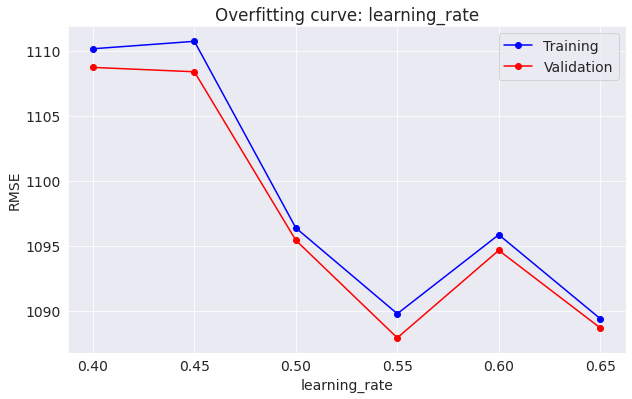

In [ ]:
xgbm_test_param_and_plot('learning_rate',list(np.arange(0.40,0.7,0.05)))

In [ ]:
xgbm_test_param_and_plot('subsample',list(np.arange(1,0.1,-0.1)))

cycle is started
[06:55:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[06:56:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[06:57:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[06:58:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[06:59:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[07:00:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cycle is started
[07:01:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:square

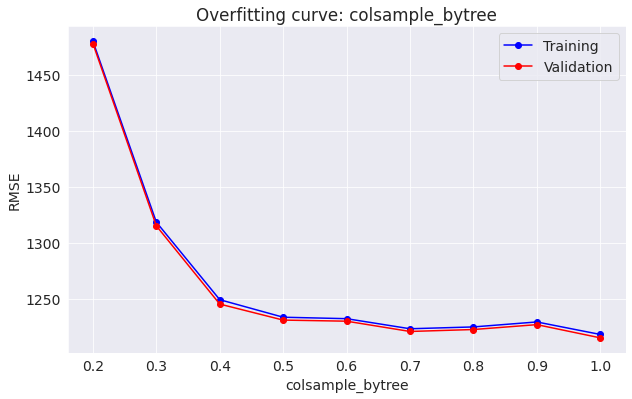

In [ ]:
xgbm_test_param_and_plot('colsample_bytree',list(np.arange(1,0.1,-0.1)))

In [ ]:
xgbm_params = {'max_depth': [13,15,17],
               #'n_estimators': [100,500],
               'learning_rate': [0.55,0.6,0.65],
               'subsample': [0.2,0.7,1.0],
               'colsample_bytree' : [0.7,0.9,1.0]
}

In [ ]:
XGBM_tree = XGBRegressor(random_state=42,n_jobs=-1)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rscv_XGBM_model = RandomizedSearchCV(estimator = XGBM_tree,
                                      param_distributions=xgbm_params,
                                      n_iter=10,
                                      cv=3,
                                      verbose=2)

In [ ]:
rscv_XGBM_model.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[07:03:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.7, learning_rate=0.55, max_depth=15, subsample=0.7; total time= 4.1min
[07:07:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.7, learning_rate=0.55, max_depth=15, subsample=0.7; total time= 4.1min
[07:11:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.7, learning_rate=0.55, max_depth=15, subsample=0.7; total time= 4.1min
[07:15:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.7, learning_rate=0.55, max_depth=15, subsample=0.2; total time= 3.3min
[07:18:33] WARNING: /workspace/src/

RandomizedSearchCV(cv=3, estimator=XGBRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'colsample_bytree': [0.7, 0.9, 1.0],
                                        'learning_rate': [0.55, 0.6, 0.65],
                                        'max_depth': [13, 15, 17],
                                        'subsample': [0.2, 0.7, 1.0]},
                   verbose=2)

In [ ]:
rscv_XGBM_model.best_score_

0.9261693027325685

In [ ]:
rscv_XGBM_model.best_params_

{'subsample': 1.0,
 'max_depth': 15,
 'learning_rate': 0.6,
 'colsample_bytree': 0.7}

In [ ]:
XGB_best_params = {'subsample': 1.0,
 'max_depth': 15,
 'learning_rate': 0.6,
 'colsample_bytree': 0.7,
 'random_state' : 42,
 'n_estimators' : 1000,
 'n_jobs' : -1
 }

In [ ]:
%%time
Xgb_best,Xgb_best_train_metrics,Xgb_best_val_metrics = try_model(XGBRegressor,**XGB_best_params)

[07:38:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The Training set metrics are :dict_items([('RMSE', 0.14039338570064996), ('R2 Score', 0.9999999978791428), ('RMSPE', 3.021450206135129e-05)])
The Validation set metrics are :dict_items([('RMSE', 790.0247693005206), ('R2 Score', 0.9326965737848081), ('RMSPE', 0.13600659416646496)])
CPU times: user 1h 51min 47s, sys: 7.33 s, total: 1h 51min 54s
Wall time: 57min 51s


In [ ]:
joblib.dump(Xgb_best, 'Xgb-best-model.joblib')

['Xgb-best-model.joblib']

In [ ]:
Xgb_best = joblib.load('Xgb-best-model.joblib')

## Stacking

In [ ]:
from sklearn.ensemble import StackingRegressor

In [ ]:
input_estimators = [
    ('lgbm' , lgbm_best),
    ('Dtree', Dtree_best)
]

In [ ]:
%%time
stack_model = StackingRegressor(estimators=input_estimators,final_estimator=lgb.LGBMRegressor(random_state=42,n_jobs=-1))
stack_model.fit(X_train,y_train.values.ravel())

CPU times: user 10min 1s, sys: 2.31 s, total: 10min 3s
Wall time: 5min 27s


StackingRegressor(estimators=[('lgbm',
                               LGBMRegressor(learning_rate=0.5, max_depth=10,
                                             n_estimators=1500, num_leaves=35,
                                             random_state=42)),
                              ('Dtree',
                               DecisionTreeRegressor(max_depth=18,
                                                     max_features=17,
                                                     max_leaf_nodes=8500,
                                                     min_impurity_decrease=0.15,
                                                     min_samples_leaf=9,
                                                     min_samples_split=3,
                                                     random_state=42))],
                  final_estimator=LGBMRegressor(random_state=42))

In [ ]:
y_train_preds = stack_model.predict(X_train)
y_val_preds = stack_model.predict(X_val)

In [ ]:
train_metrics = metrics(y_train, y_train_preds)
val_metrics = metrics(y_val, y_val_preds)
print(f"The Training set metrics are :{train_metrics.items()}")
print(f"The Validation set metrics are :{val_metrics.items()}")

The Training set metrics are :dict_items([('RMSE', 566.9635813676692), ('R2 Score', 0.9654117618348835), ('RMSPE', 0.168540514620572)])
The Validation set metrics are :dict_items([('RMSE', 660.2640992607139), ('R2 Score', 0.9529899053391626), ('RMSPE', 0.11745683637464215)])


In [ ]:
joblib.dump(stack_model, 'stack_model.joblib')


['stack_model.joblib']

In [ ]:
stack_model = joblib.load('stack_model.joblib')

## Feature importance and Submission

In [ ]:
test_inputs = pd.read_parquet("test_inputs.parquet")
store_close_filt = pd.read_csv("test_close_filt.csv",index_col=["Id"])
def make_submission_file(model,file_name):
    submission_df = pd.read_csv("./rossmann-store-sales/sample_submission.csv",index_col=["Id"])
    y_test_preds = model.predict(test_inputs)
    submission_df["Sales"] = y_test_preds
    submission_df[store_close_filt["Open"]] = 0
    submission_df.to_csv(f"{file_name}.csv")
    return f"{file_name}.csv is created."

Descision Tree Final Submission

In [ ]:
Dtree_best

DecisionTreeRegressor(max_depth=18, max_features=17, max_leaf_nodes=8500,
                      min_impurity_decrease=0.15, min_samples_leaf=9,
                      min_samples_split=3, random_state=42)

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'Descision_tree': Dtree_best.feature_importances_
})

In [ ]:
make_submission_file(Dtree_best,"Descision-Tree-submission")

'Descision-Tree-submission.csv is created.'

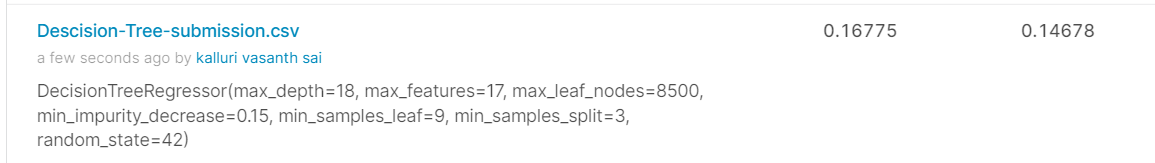

In [ ]:
Dtree_test_RMPSE = 0.16775

Random Forest Regressor Submission

In [ ]:
RFR_best

RandomForestRegressor(max_features=0.5, min_samples_split=3, n_estimators=250,
                      n_jobs=-1, random_state=42)

In [ ]:
importance_df["Random-Forest"] = RFR_best.feature_importances_

In [ ]:
make_submission_file(RFR_best,"Random-Forest-submission")

'Random-Forest-submission.csv is created.'

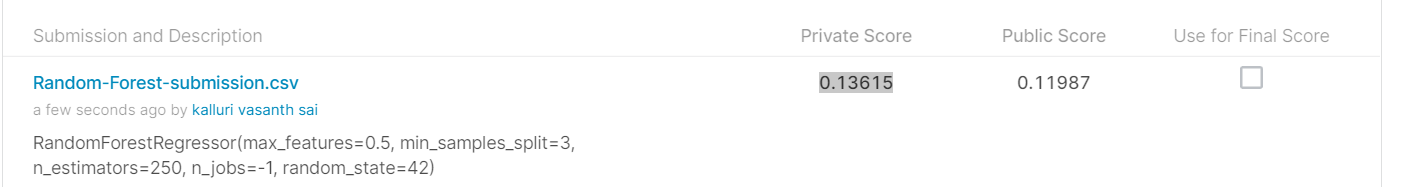

In [ ]:
RFR_test_RMPSE = 0.13615

LGBM Submission

In [ ]:
lgbm_best

LGBMRegressor(learning_rate=0.5, max_depth=10, n_estimators=1500, num_leaves=35,
              random_state=42)

In [ ]:
importance_df["Light-GBM"] = lgbm_best.feature_importances_

In [ ]:
make_submission_file(lgbm_best,"Light-GBM-submission")

'Light-GBM-submission.csv is created.'

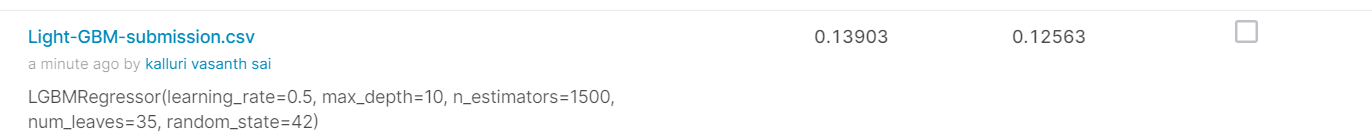

In [ ]:
lgbm_test_RMPSE = 0.13903

XG Boost Submission

In [ ]:
Xgb_best

XGBRegressor(colsample_bytree=0.7, learning_rate=0.6, max_depth=15,
             n_estimators=1000, n_jobs=-1, random_state=42, subsample=1.0)

In [ ]:
importance_df["XG-boost"] =  Xgb_best.feature_importances_

In [ ]:
make_submission_file(Xgb_best,"XG-Boost-submission")

'XG-Boost-submission.csv is created.'

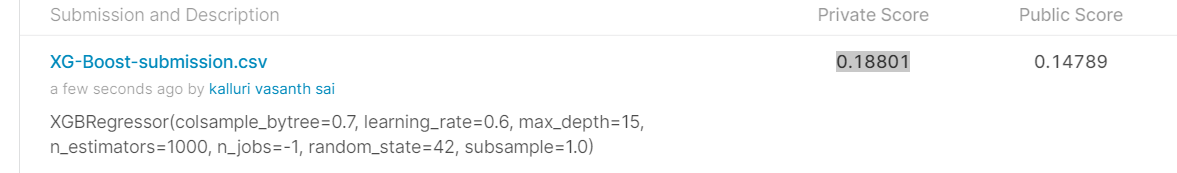


In [ ]:
Xgb_test_RMPSE = 0.18801

Stacked Model Submission

In [ ]:
stack_model

StackingRegressor(estimators=[('lgbm',
                               LGBMRegressor(learning_rate=0.5, max_depth=10,
                                             n_estimators=1500, num_leaves=35,
                                             random_state=42)),
                              ('Dtree',
                               DecisionTreeRegressor(max_depth=18,
                                                     max_features=17,
                                                     max_leaf_nodes=8500,
                                                     min_impurity_decrease=0.15,
                                                     min_samples_leaf=9,
                                                     min_samples_split=3,
                                                     random_state=42))],
                  final_estimator=LGBMRegressor(random_state=42))

In [ ]:
make_submission_file(stack_model,"stack-model-submission")

'stack-model-submission.csv is created.'


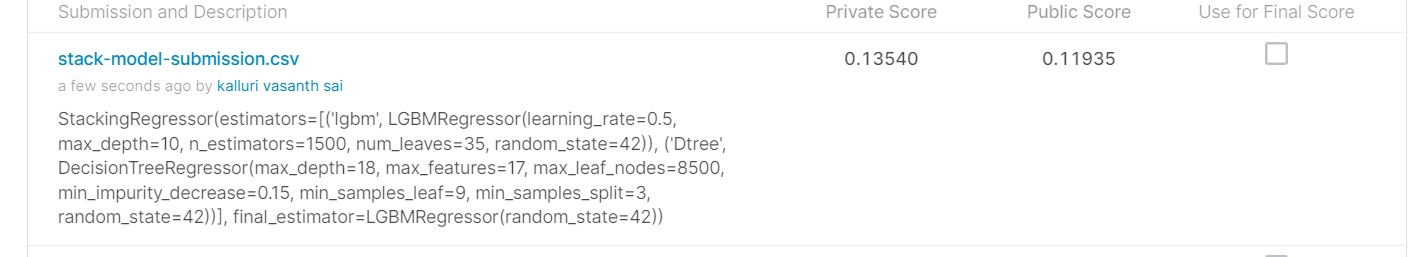


In [ ]:
stack_model_test_RMSPE = 0.13540

- Feature Importance

In [ ]:
importance_df

,feature,Descision_tree,Random-Forest,Light-GBM,XG-Boost
0,Store,0.008772,0.017219,5706,0.002978
1,CompetitionDistance,0.012439,0.025017,5594,0.009011
2,CompetitionOpen,0.006315,0.017744,5756,0.004101
3,Day,0.025313,0.040506,5853,0.020414
4,Month,0.020877,0.019221,2285,0.003727
5,WeekOfYear,0.022857,0.034402,4221,0.039130
6,Promo2,0.008775,0.003530,426,0.008906
7,Avg_sales_per_day,0.665572,0.605252,6552,0.270212
8,Promo2Open,0.004087,0.012505,4348,0.004128
9,Promo,0.154494,0.138866,1841,0.018926


In [ ]:
importance_df.to_parquet("importance-df.parquet")

In [ ]:
importance_df = pd.read_parquet("importance-df.parquet")

### commit

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="rossman-sales-prediction")

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab
